In [ ]:
# 출처 : 유튜브 오늘코드 박조은 강사님 강의

In [ ]:
# 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

In [23]:
# pandas, numpy 라이브러리 로드하기
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
# file_name 변수에 read_html 로 저장한 파일명을 지정해 줍니다.
# f는 포맷을 의미 (포맷팅)
file_name = f"seoul-covid19-11_28_.csv"
file_name

'seoul-covid19-11_28_.csv'

In [4]:
# read_csv 로 csv 파일을 불러와 주세요.
df = pd.read_csv(file_name)
df.shape

(8652, 7)

In [5]:
# "연번"을 기준으로 역순으로 정렬합니다.
df = df.sort_values("연번", ascending = False)

In [6]:
# head 로 미리보기를 합니다.
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,8652,33532,11.28.,서대문구,-,기타 확진자 접촉,NaN
1,8651,33756,11.28.,타시도,-,감염경로 조사중,NaN
2,8650,33772,11.28.,동작구,-,동작구 임용단기학원 관련,NaN
3,8649,33776,11.28.,은평구,-,기타 확진자 접촉,NaN
4,8648,33768,11.28.,서초구,-,기타 확진자 접촉,NaN


In [7]:
# tail 로 미리보기를 합니다.
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
8647,5,9,1.31.,성북구,-,#5 접촉,퇴원
8648,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
8649,3,6,1.30.,종로구,-,#3 접촉,퇴원
8650,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
8651,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원


## 시각화 도구 불러오기

<AxesSubplot:title={'center':'한글'}>

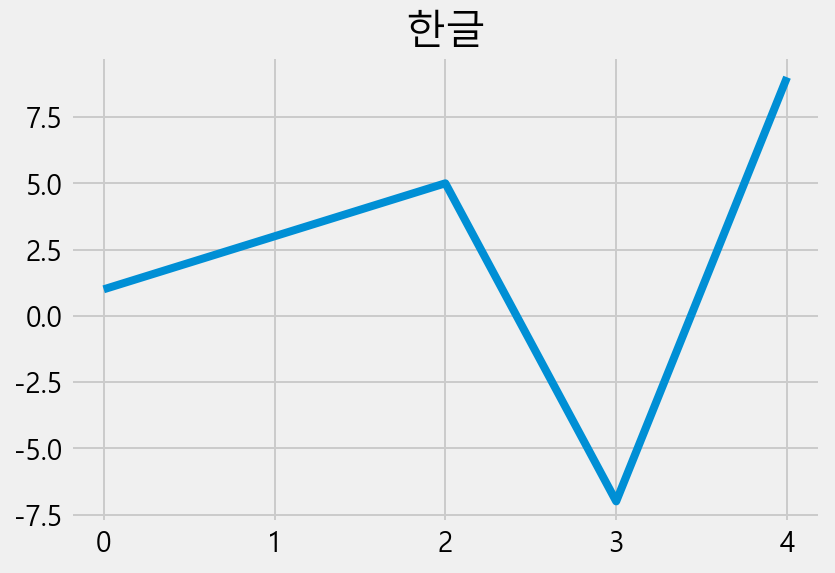

In [83]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다. (판다스를 위한 시각화 도구)
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.
# 참고 : matplotlib을 사용하기 편리하게 해놓은 seaborn
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic") #맥은 AppleGothic
plt.rc("axes", unicode_minus = False)

# matplotlib에서 제공하는 스타일 설정
plt.style.use("fivethirtyeight")

# Series 형태로 바꾸어주지 않은 리스트에는 판다스 기능 적용불가
pd.Series([1,3,5,-7,9]).plot(title = "한글")

# subplot 하나를 axes로 부름

### 시각화 선명하게 설정하기

In [9]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 확진일

In [10]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.
df["확진일"].value_counts().head()

11.25.    212
11.26.    204
11.27.    178
8.29.     167
8.27.     160
Name: 확진일, dtype: int64

In [11]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.
df["확진일"].head()

0    11.28.
1    11.28.
2    11.28.
3    11.28.
4    11.28.
Name: 확진일, dtype: object

In [12]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.

df["확진일자"] = pd.to_datetime("2020." + df["확진일"])
df[["확진일", "확진일자"]].describe()
# freq : top이 몇 번 등장하는지
# unique값이 다른 것은 텍스트가 datetime으로 바꿔지지 않는 형태로 들어가 있어서일 가능성..

<ipython-input-12-46bb883ec141>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[["확진일", "확진일자"]].describe()


,확진일,확진일자
count,8652,8652
unique,283,281
top,11.25.,2020-11-25 00:00:00
freq,212,212
first,NaN,2020-01-24 00:00:00
last,NaN,2020-11-28 00:00:00


In [13]:
# 월만 추출합니다. 판다스의 dt함수 사용

df["월"] = df["확진일자"].dt.month

In [14]:
# 해당 연도의 몇번째 "주"인지 추출합니다.

df["주"] = df["확진일자"].dt.isocalendar().week
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
0,8652,33532,11.28.,서대문구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
1,8651,33756,11.28.,타시도,-,감염경로 조사중,NaN,2020-11-28,11,48
2,8650,33772,11.28.,동작구,-,동작구 임용단기학원 관련,NaN,2020-11-28,11,48
3,8649,33776,11.28.,은평구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
4,8648,33768,11.28.,서초구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
...,...,...,...,...,...,...,...,...,...,...
8647,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5
8648,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5
8649,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5
8650,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

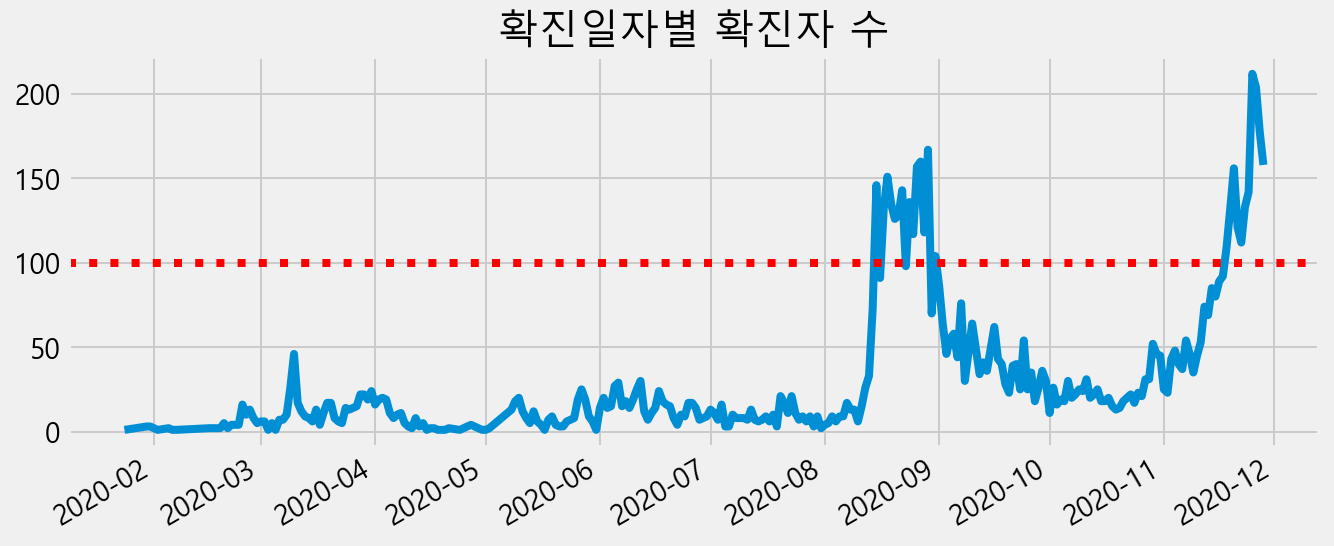

In [87]:
# 확진일자로 선그래프를 그립니다.
df["확진일자"].value_counts().plot(title = "확진일자별 확진자 수",
                               figsize = (10, 4), grid = True)
plt.axhline(100, color = "red", linestyle = ":")

In [93]:
# 선그래프에 숫자 표시하기 (str type으로 바꿔서 문자인덱싱)
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
day_count = df["월일"].value_counts().sort_index()
day_count.iloc[2]

3

In [101]:
# 인덱스, 확진자수 표시되는 for문 만들기
for i in range(len(day_count)):
    print(i, day_count.iloc[i])

0 1
1 3
2 3
3 1
4 2
5 1
6 1
7 2
8 2
9 5
10 2
11 4
12 4
13 4
14 16
15 10
16 13
17 8
18 5
19 6
20 6
21 1
22 5
23 1
24 7
25 7
26 10
27 26
28 46
29 17
30 12
31 9
32 8
33 6
34 13
35 4
36 11
37 17
38 17
39 8
40 6
41 5
42 14
43 13
44 14
45 15
46 22
47 22
48 19
49 24
50 16
51 19
52 20
53 19
54 11
55 8
56 10
57 11
58 5
59 3
60 2
61 8
62 3
63 5
64 1
65 2
66 2
67 1
68 1
69 1
70 2
71 1
72 4
73 1
74 1
75 2
76 13
77 18
78 20
79 12
80 8
81 5
82 12
83 6
84 4
85 1
86 7
87 9
88 4
89 3
90 3
91 6
92 7
93 8
94 19
95 25
96 19
97 9
98 6
99 1
100 14
101 20
102 14
103 15
104 27
105 29
106 15
107 18
108 14
109 19
110 25
111 30
112 12
113 7
114 11
115 14
116 24
117 18
118 16
119 15
120 8
121 4
122 10
123 9
124 17
125 17
126 14
127 7
128 8
129 9
130 13
131 11
132 7
133 16
134 3
135 3
136 10
137 8
138 8
139 8
140 7
141 13
142 7
143 6
144 7
145 9
146 6
147 10
148 3
149 21
150 17
151 11
152 21
153 11
154 7
155 9
156 6
157 9
158 3
159 9
160 2
161 4
162 5
163 9
164 6
165 9
166 9
167 17
168 13
169 13
170 6
171 15
172 2

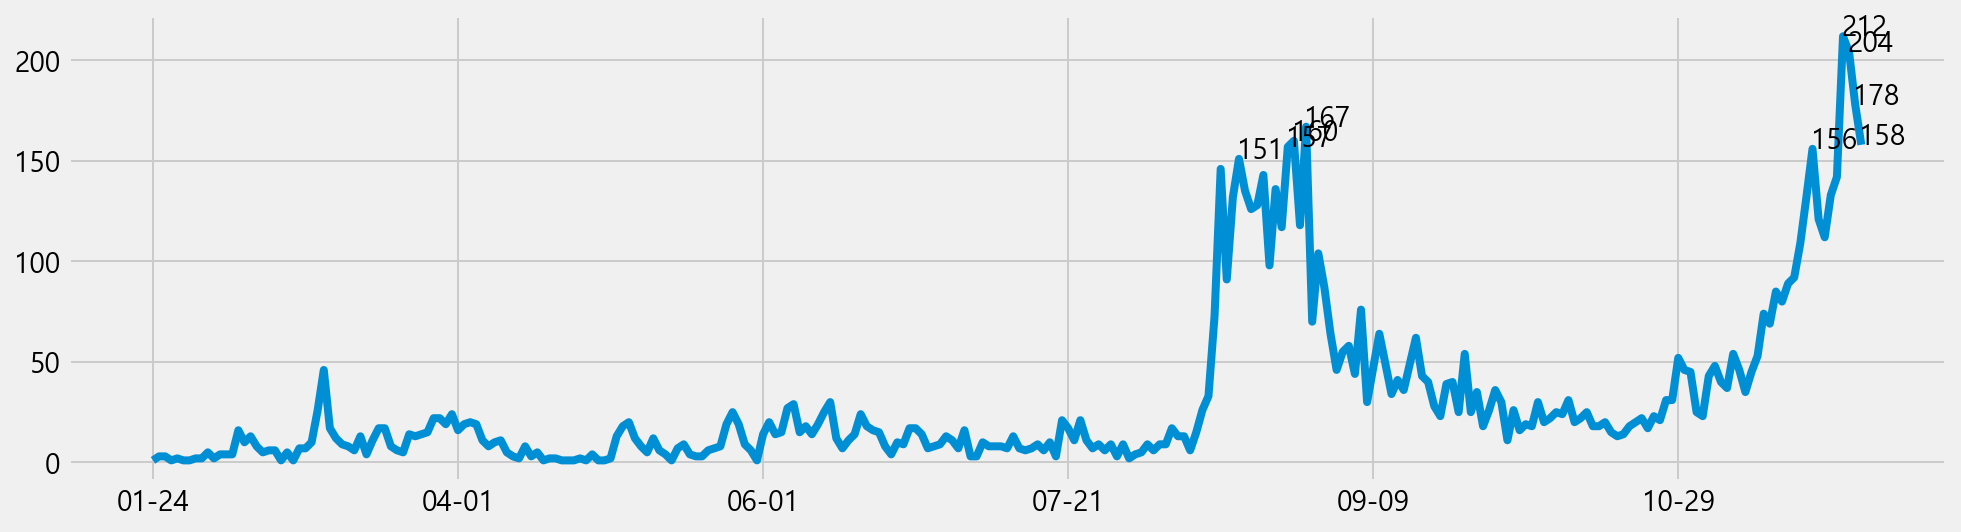

In [106]:
g = day_count.plot(figsize = (15,4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 150:
        g.text(x=i-0.3, y=case_count, s=case_count)

In [16]:
# 참고 : %timeit 코드 : 실행시간 알려줌

### 확진자가 가장 많이 나온 날

In [124]:
day_count.max()

212

In [107]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.
df["확진일자"].describe()

<ipython-input-107-e5fd44a8918a>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["확진일자"].describe()


count                    8652
unique                    281
top       2020-11-25 00:00:00
freq                      212
first     2020-01-24 00:00:00
last      2020-11-28 00:00:00
Name: 확진일자, dtype: object

In [133]:
# 확진자가 가장 많았던 날을 찾습니다.
df_most = df[df["확진일자"] == "2020-11-25"]

In [134]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.
df_most["접촉력"].unique()

array(['기타 확진자 접촉', '중구 소재 보람상조회사 관련', '확인 중', '강서구 댄스교습관련 시설',
       '서초구 사우나Ⅱ 관련', '해외 유입', '강남구 연기학원 관련', '용산구 국군복지단 관련',
       '타시도 확진자 접촉', '강서구 댄스교습관련 시설(서울대효병원)', '강서구 소재 병원관련(11월)',
       '지인-가족전파', '서초구 사우나 관련', '중구 소재 상조회사 관련', '마포구 홍대새교회 관련',
       '동창 운동 모임 관련', '어플 소모임 관련', '노원구 가족관련', '동작구 임용단기고시 관련'],
      dtype=object)

### 막대그래프 그리기

<AxesSubplot:>

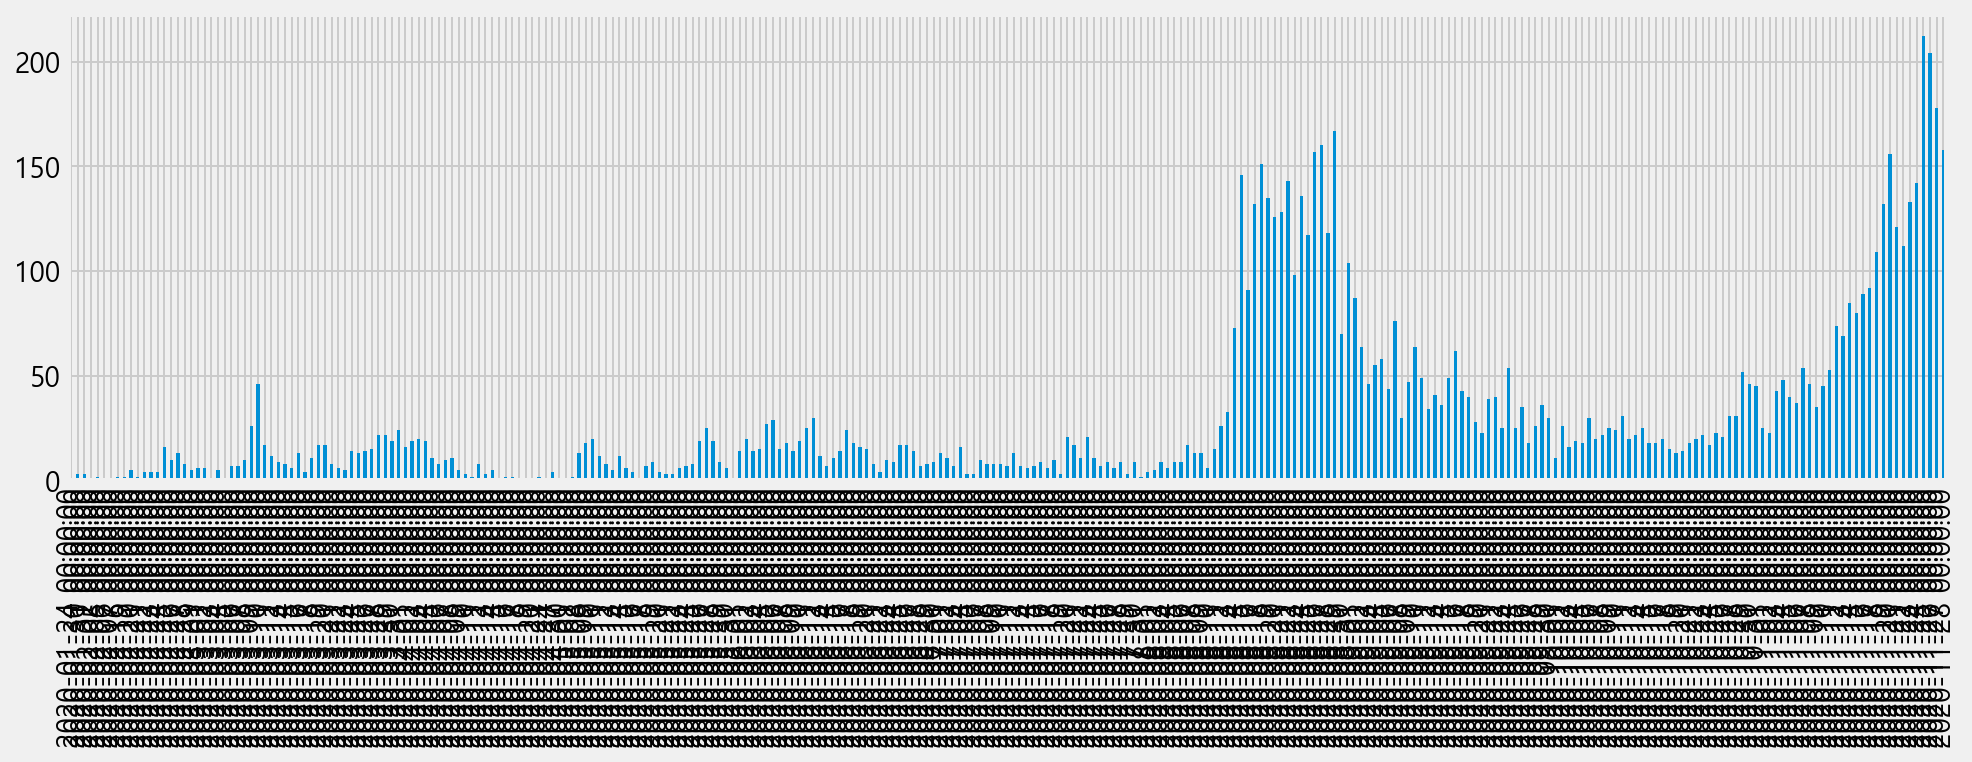

In [135]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.
# 빈도수 높은 순으로, 모든 날짜 표시해줌
# 막대그래프는 데이터를 범주형이라고 인식함, 빈도수로 자동 정렬
# 연속된 수치 데이터는 선그래프로 그리는게 좋을수 있음

day_count = df["확진일자"].value_counts().sort_index()
day_count.plot.bar(figsize = (15,4))

### 최근 데이터만 슬라이싱으로 나눠 그리기

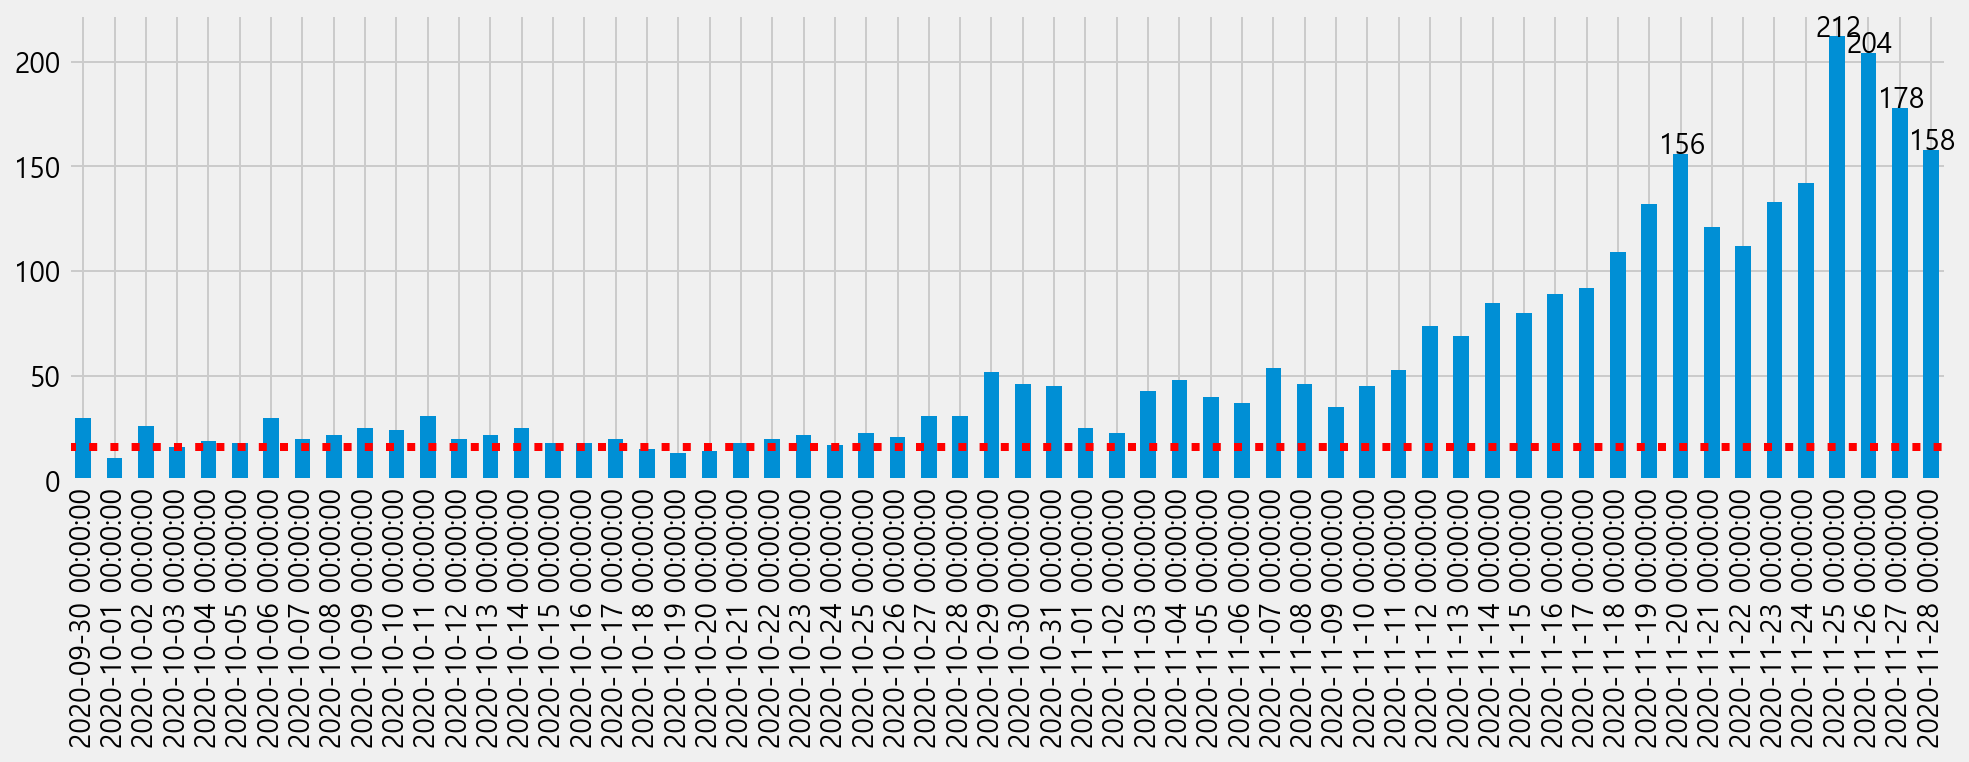

In [148]:
# 슬라이싱을 통해 최근 데이터만 그립니다.
# rot로 라벨 텍스트 기울기 설정해줄 수 있음
# 라벨값 조정하려면 matplotlib에서 설정을 일일이 조정해줘야 함
# plotly로 비교적 손쉽게 인터랙티브 시각화도 가능

g = day_count[-60:].plot.bar(figsize = (15,4), rot = 90)
g.axhline(day_count.median(), linestyle = ":", color = "red")

for i in range(60):
    case_count = day_count[-60:].iloc[i]
    if case_count > 150:
        g.text(x = i-0.7, y = case_count, s = case_count)

### 월별 확진자 수 그리기

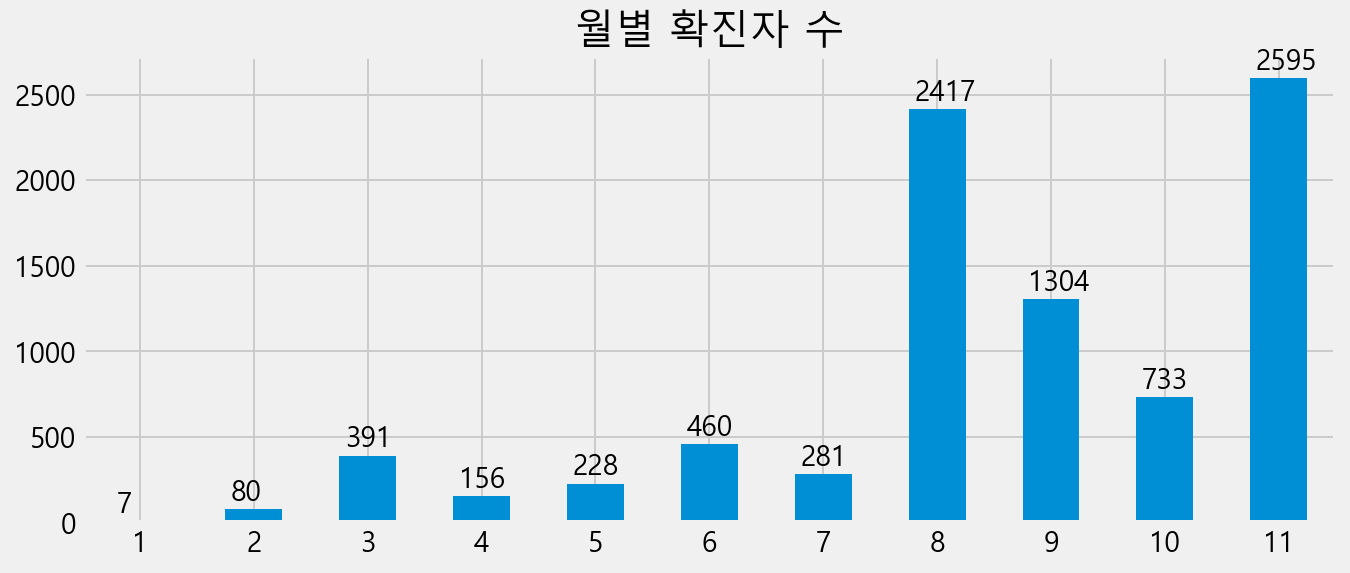

In [163]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.
month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot = 0, figsize = (10, 4), title = "월별 확진자 수")

# 월별 확진자수 텍스트 표시
for i in range(len(month_case)):
    g.text(x = i-0.2, y = month_case.iloc[i]+50, s = month_case.iloc[i])

<AxesSubplot:title={'center':'월별 확진자 수'}>

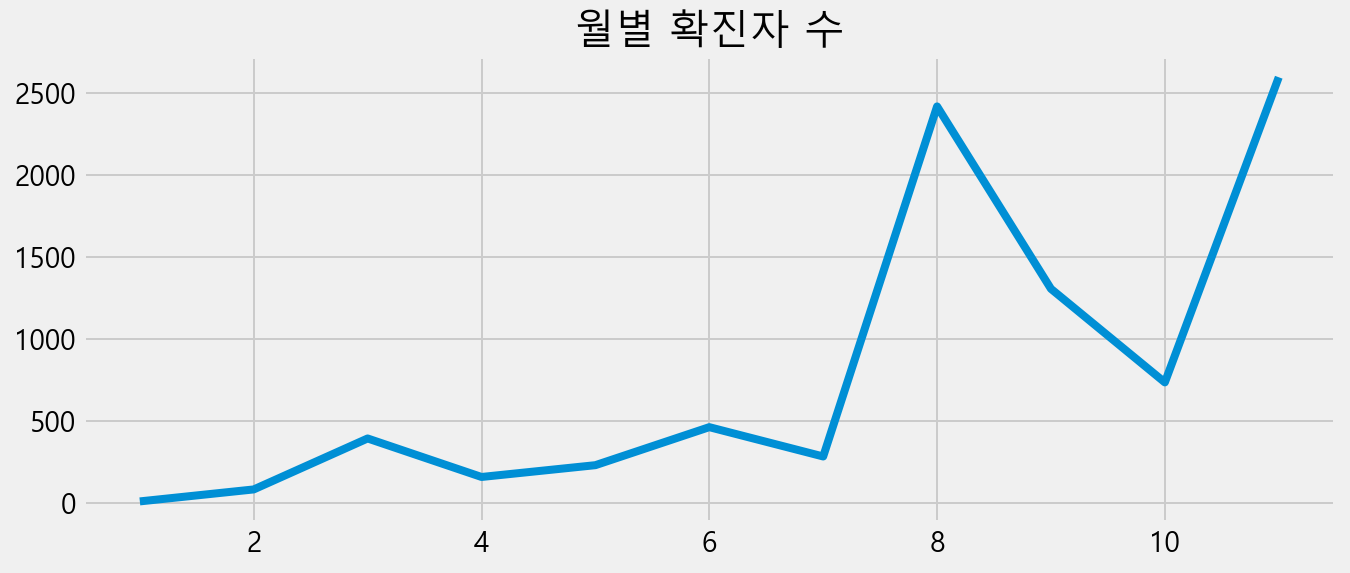

In [150]:
# 확진월로 선그래프를 그립니다.
df["월"].value_counts().sort_index().plot(title = "월별 확진자 수",
                                        figsize = (10, 4), grid = True)

### 주단위 확진자수 그리기

In [166]:
# 주별로 빈도수를 구합니다.
# value_counts()는 값이 큰 순서대로 자동으로 정렬. sort_index() 해줘야 시간순 정렬
week_count = df["주"].value_counts().sort_index()

<AxesSubplot:title={'center':'주별 확진자 수'}>

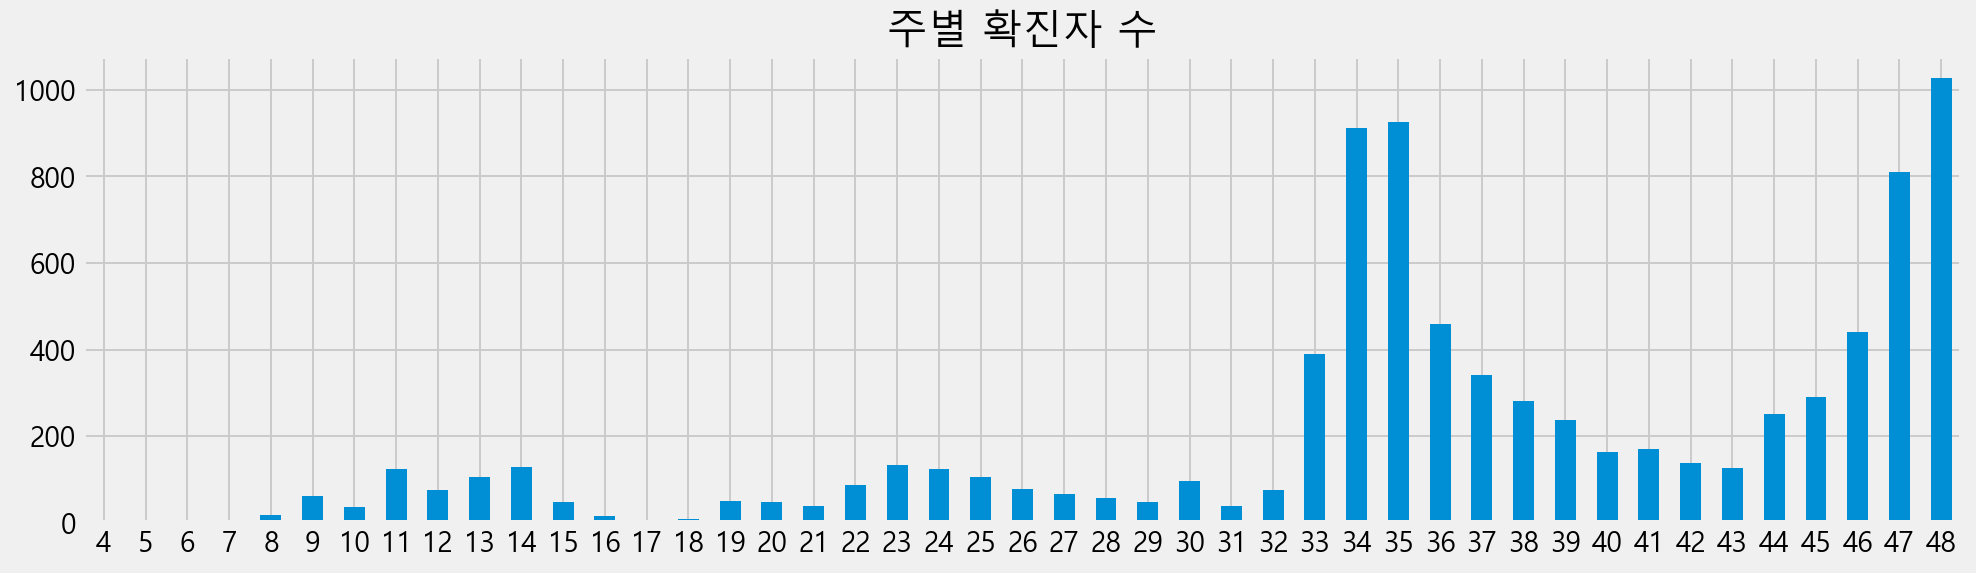

In [168]:
# 주단위 빈도수 막대그래프로 그리기
week_count.plot.bar(figsize = (15,4), rot = 0, title = "주별 확진자 수")

### 월-주 함께 그리기

In [173]:
# groupby를 통해 "월", "주"로 그룹화 하여 빈도수 계산
# value_counts는 시리즈일 때만 쓸 수 있음
month_week_count = df.groupby(["월", "주"])["연번"].count()
month_week_count

월   주 
1   4        1
    5        6
2   5        1
    6        4
    7        2
    8       17
    9       56
3   9        6
    10      37
    11     124
    12      76
    13     105
    14      43
4   14      85
    15      47
    16      15
    17       4
    18       5
5   18       3
    19      51
    20      48
    21      39
    22      87
6   23     134
    24     125
    25     106
    26      78
    27      17
7   27      50
    28      57
    29      48
    30      97
    31      29
8   31       9
    32      76
    33     390
    34     913
    35     925
    36     104
9   36     354
    37     341
    38     281
    39     236
    40      92
10  40      72
    41     170
    42     138
    43     127
    44     226
11  44      25
    45     291
    46     441
    47     811
    48    1027
Name: 연번, dtype: int64

<AxesSubplot:xlabel='월,주'>

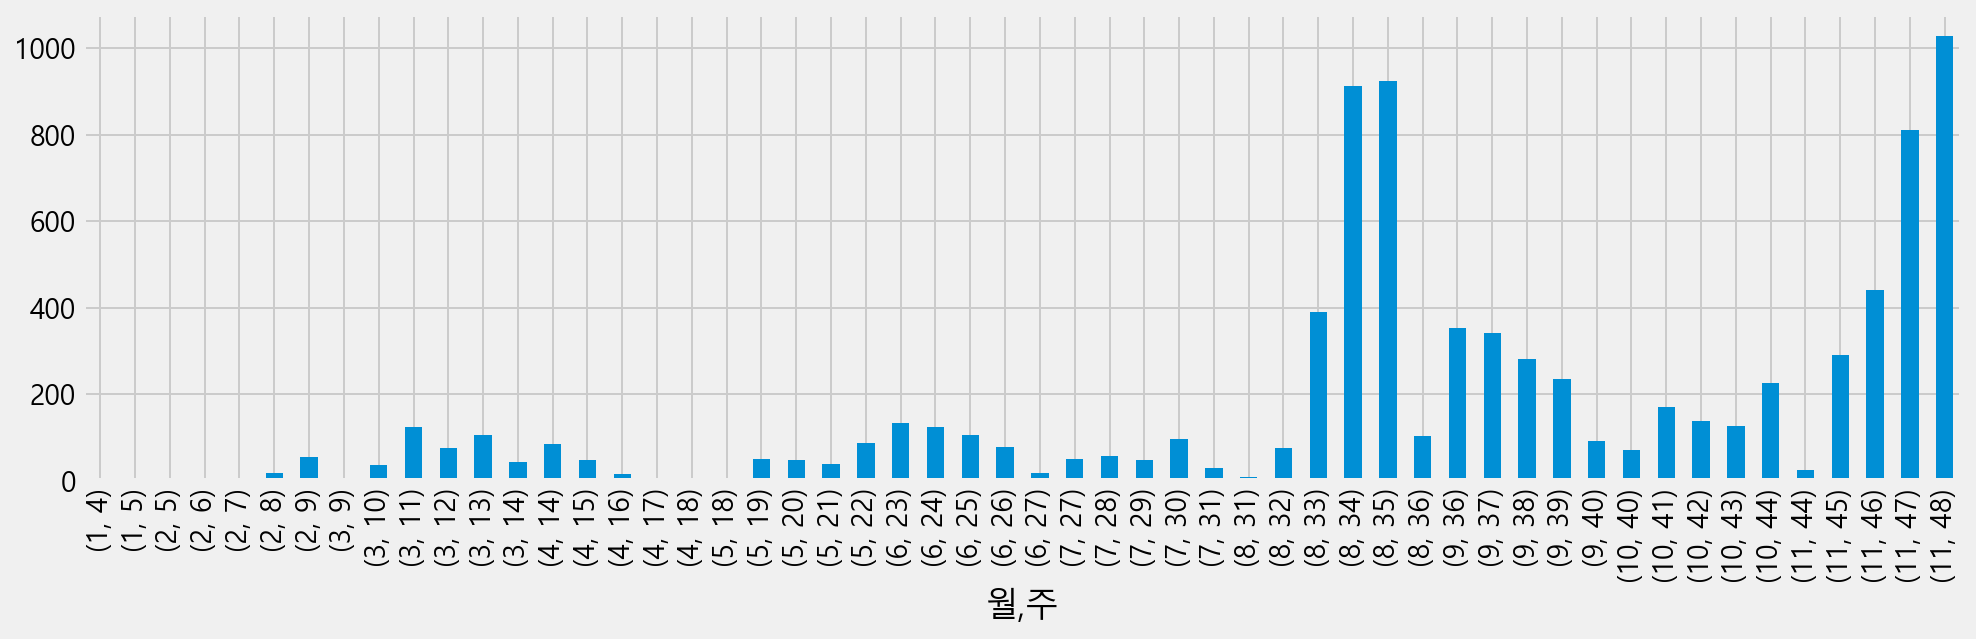

In [178]:
# x축 (월, 주) 멀티인덱스로 표시됨
month_week_count.plot.bar(figsize = (15, 4))

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [179]:
df["확진일자"].value_counts().sort_index()
# 초반에 빠진날이 있어서 모든 날짜에 대한 시각화가 안됨

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2020-11-24    142
2020-11-25    212
2020-11-26    204
2020-11-27    178
2020-11-28    158
Name: 확진일자, Length: 281, dtype: int64

In [184]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.
# iloc는 인덱스 순서로 데이터 가져올 수 있음
first_day = df.iloc[-1, 7]
first_day

Timestamp('2020-01-24 00:00:00')

In [181]:
# 아래 방법보다 위와 같이 인덱스 번호로만 불러오는게 속도 더 빠름
last_day = df.iloc[0]["확진일자"]
last_day

Timestamp('2020-11-28 00:00:00')

In [186]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.

days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22',
               '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26',
               '2020-11-27', '2020-11-28'],
              dtype='datetime64[ns]', length=310, freq='D')

In [197]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
# pd.DataFrame({"확진일자" : days})로 만들어 줄 수도 있음
df_days = days.to_frame()
df_days

,0
2020-01-24,2020-01-24
2020-01-25,2020-01-25
2020-01-26,2020-01-26
2020-01-27,2020-01-27
2020-01-28,2020-01-28
...,...
2020-11-24,2020-11-24
2020-11-25,2020-11-25
2020-11-26,2020-11-26
2020-11-27,2020-11-27


In [193]:
# 확진일자별로 빈도수 구하기
daily_case = df["확진일자"].value_counts().sort_index()
daily_case

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2020-11-24    142
2020-11-25    212
2020-11-26    204
2020-11-27    178
2020-11-28    158
Name: 확진일자, Length: 281, dtype: int64

In [194]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기
df_daily_case = daily_case.reset_index()
df_daily_case

,index,확진일자
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
276,2020-11-24,142
277,2020-11-25,212
278,2020-11-26,204
279,2020-11-27,178


In [195]:
# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기
df_daily_case.columns = ["확진일자", "확진수"]
df_daily_case

,확진일자,확진수
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
276,2020-11-24,142
277,2020-11-25,212
278,2020-11-26,204
279,2020-11-27,178


### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [199]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.
all_day = df_days.merge(df_daily_case, left_on = df_days.index, right_on = "확진일자", how = "left")
all_day = all_day.drop(0, axis = 1)
all_day

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
305,2020-11-24,142.0
306,2020-11-25,212.0
307,2020-11-26,204.0
308,2020-11-27,178.0


## 누적 확진자 수 구하기

In [200]:
type(np.nan)

float

In [201]:
# 확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.
# 확진수 컬럼은 nan값 때문에 float 타입으로 되어있음
all_day = all_day.fillna(0)
all_day

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,0.0
2,2020-01-26,0.0
3,2020-01-27,0.0
4,2020-01-28,0.0
...,...,...
305,2020-11-24,142.0
306,2020-11-25,212.0
307,2020-11-26,204.0
308,2020-11-27,178.0


In [204]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기
# string type으로 바꾸고 인덱싱
all_day["일자"] = all_day["확진일자"].astype(str).str[-5:]
all_day

,확진일자,확진수,일자
0,2020-01-24,1.0,01-24
1,2020-01-25,0.0,01-25
2,2020-01-26,0.0,01-26
3,2020-01-27,0.0,01-27
4,2020-01-28,0.0,01-28
...,...,...,...
305,2020-11-24,142.0,11-24
306,2020-11-25,212.0,11-25
307,2020-11-26,204.0,11-26
308,2020-11-27,178.0,11-27


In [208]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
# cum_day
all_day["누적확진"] = all_day["확진수"].cumsum()
all_day.tail(10)

,확진일자,확진수,일자,누적확진
300,2020-11-19,132.0,11-19,7236.0
301,2020-11-20,156.0,11-20,7392.0
302,2020-11-21,121.0,11-21,7513.0
303,2020-11-22,112.0,11-22,7625.0
304,2020-11-23,133.0,11-23,7758.0
305,2020-11-24,142.0,11-24,7900.0
306,2020-11-25,212.0,11-25,8112.0
307,2020-11-26,204.0,11-26,8316.0
308,2020-11-27,178.0,11-27,8494.0
309,2020-11-28,158.0,11-28,8652.0


### 데이터프레임으로 그리기

<AxesSubplot:title={'center':'확진수와 누적확진수'}, xlabel='확진일자'>

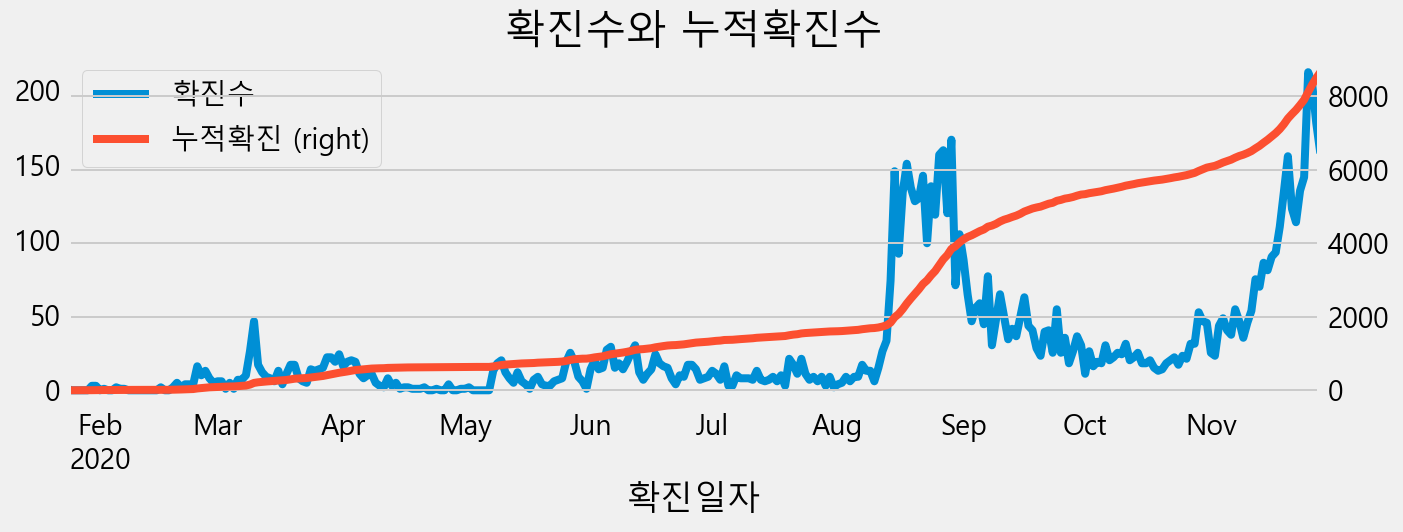

In [209]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.
# x축에 들어갈 값을 인덱스로 만들어주면 됨 (여기서 확진일자)
# 권장하는 방법은 아님 (확진수, 누적확진수 스케일이 달라서 확진수의 변화가 잘 안보임)
# 스케일 다를때 1) 그래프 그릴 때 스케일이 다른 경우 로그변환 해서 그리기도 함
# 스케일 다를때 2) secondary_y : 스케일을 y축에 추가해줌

all_day.set_index("확진일자")[["확진수", "누적확진"]].plot(figsize=(10,3),
                                                title = "확진수와 누적확진수",
                                                secondary_y = "누적확진")

### 시리즈로 그리기

<AxesSubplot:xlabel='확진일자'>

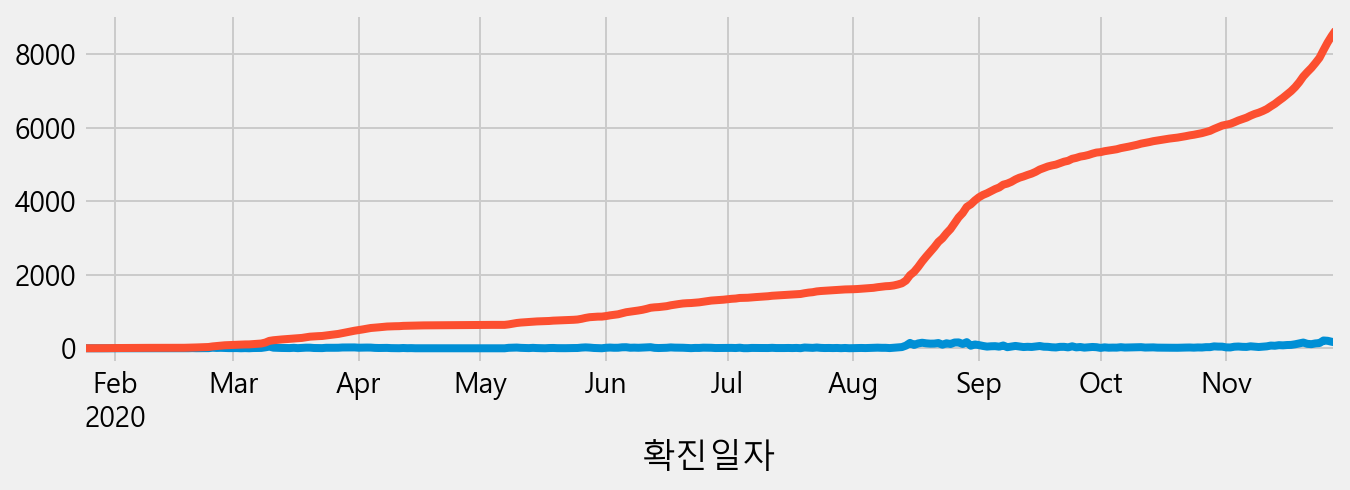

In [210]:
# 시리즈로 2개의 그래프 그리기
# 연속으로 코드 쓰면 겹쳐서 그려줌
# 범례값을 따로 설정해줘야 하므로 위 방법이 편리함
all_day.set_index("확진일자")["확진수"].plot(figsize = (10,3))
all_day.set_index("확진일자")["누적확진"].plot()

### 확진수만 따로 그리기

<AxesSubplot:xlabel='확진일자'>

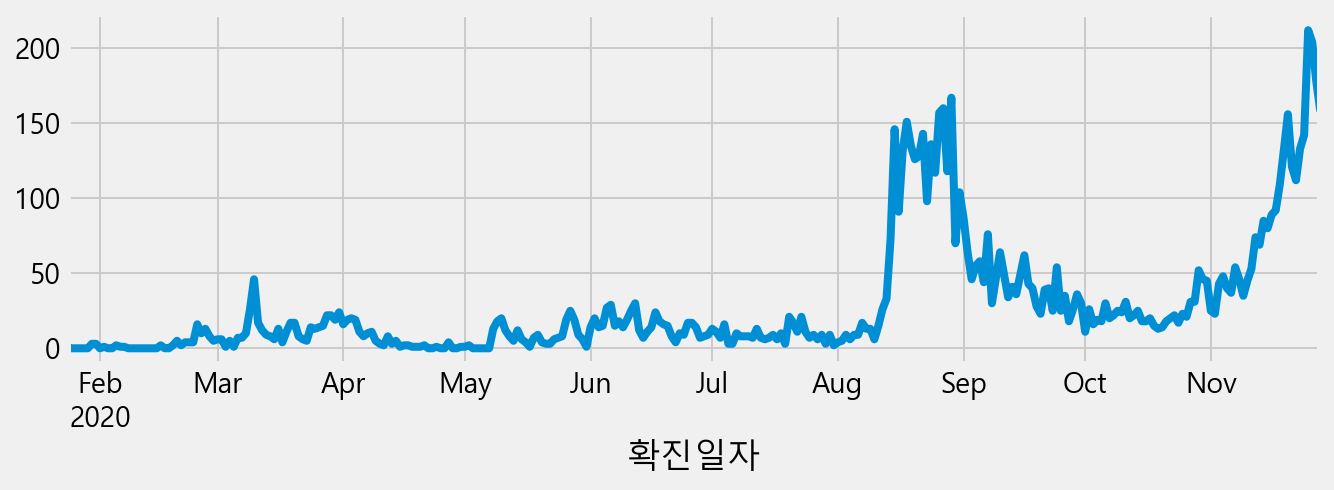

In [211]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.
# pandas로 그래프 그릴때는 중심축을 set_index 해주는게 중요 (cf. seaborn)
# seaborn으로 시각화 하는 것은 조금 차이가 있음. pandas, seaborn이 각각 강점있는 분야가 있음.
all_day.set_index("확진일자")["확진수"].plot(figsize = (10, 3))

### 누적확진만 따로 그리기

<AxesSubplot:xlabel='확진일자'>

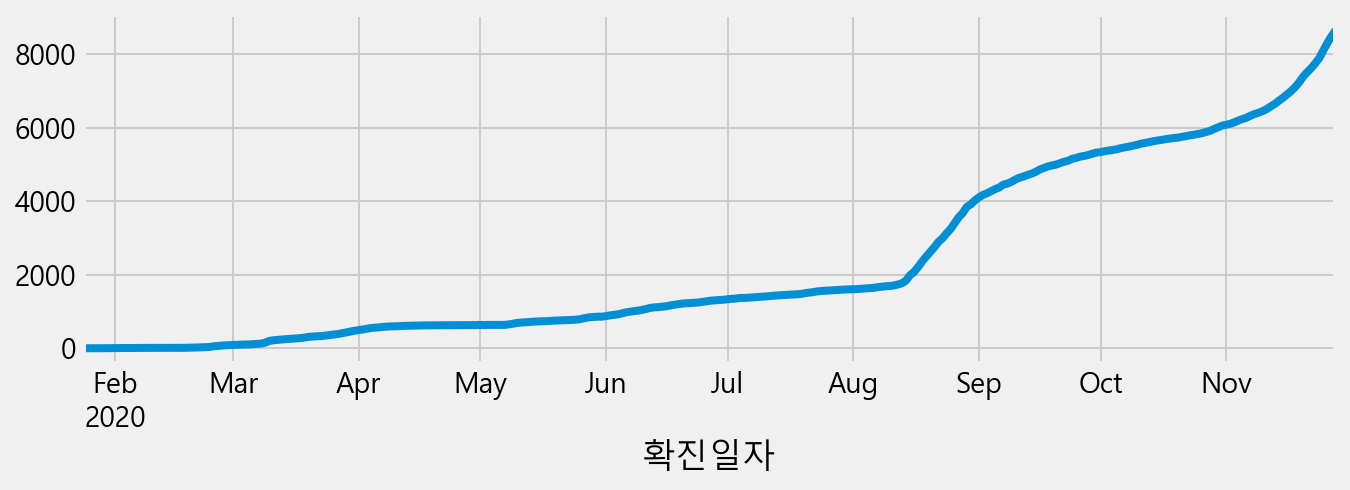

In [212]:
# 누적확진만 따로 그립니다.
all_day.set_index("확진일자")["누적확진"].plot(figsize = (10, 3))

### 로그스케일
* 차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

In [213]:
all_day = all_day.set_index("확진일자")

<AxesSubplot:>

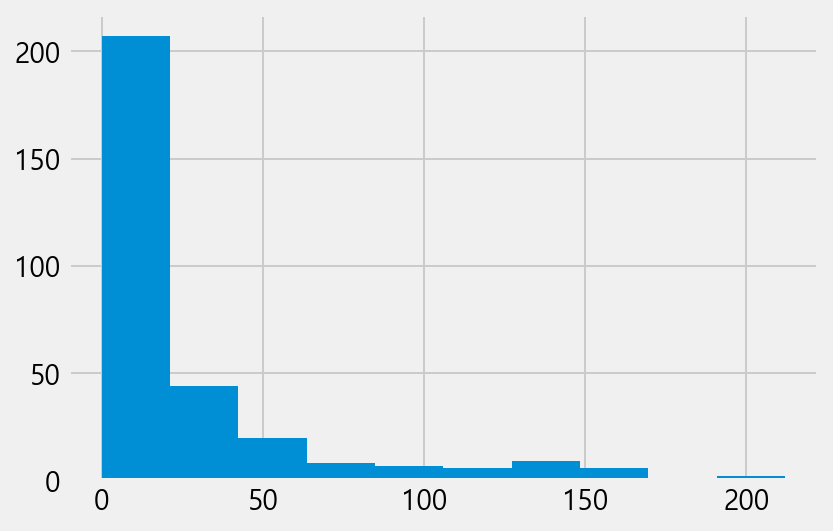

In [214]:
all_day["확진수"].hist()

<AxesSubplot:>

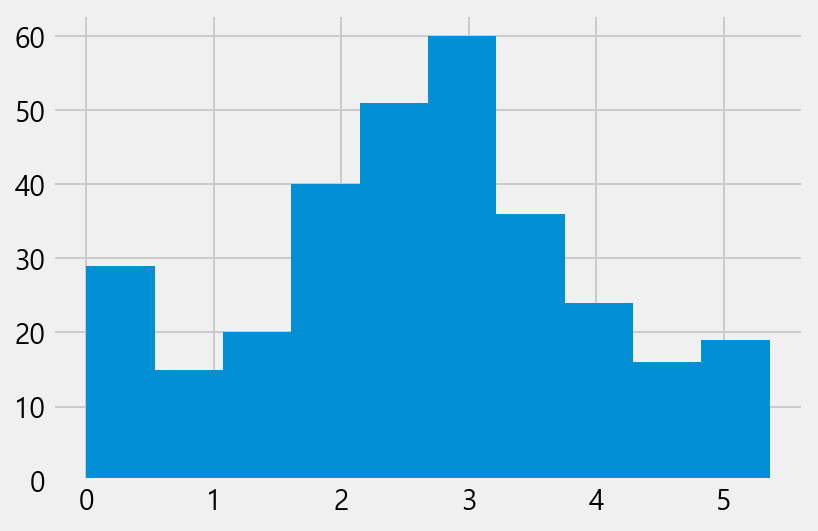

In [215]:
# 로그값으로 정규화
np.log1p(all_day["확진수"]).hist()

<AxesSubplot:xlabel='확진일자'>

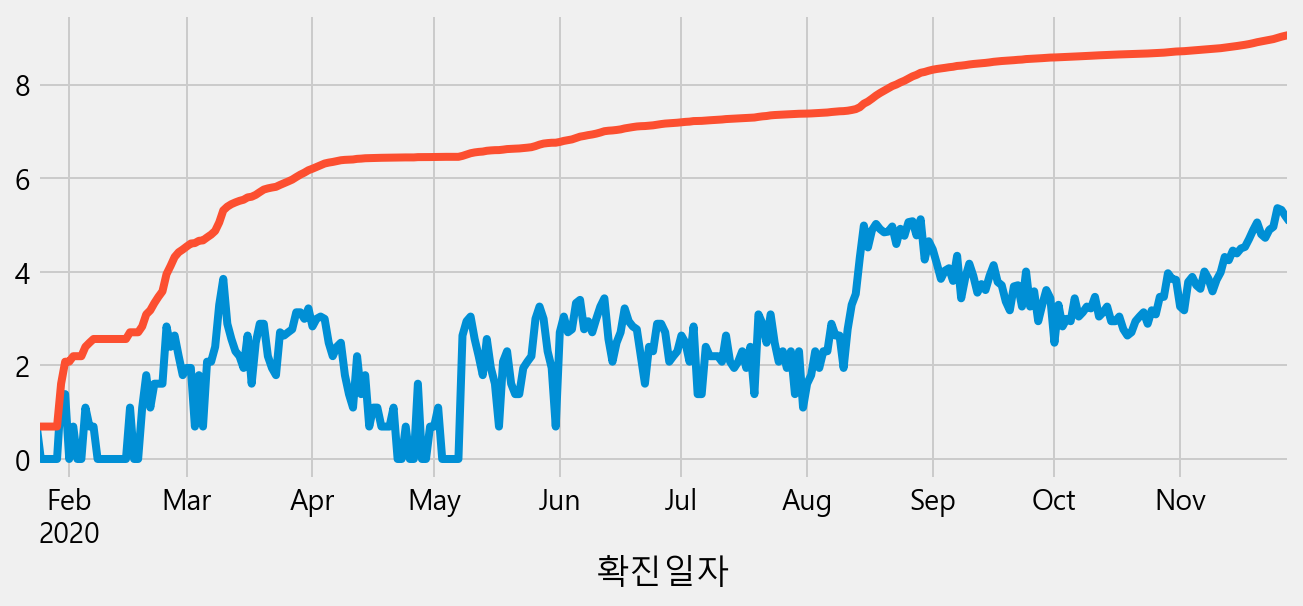

In [216]:
# 0값에 로그 취하면 -inf 나와서 오류남
# 아래 2개 방법중 하나로 (1을 더해주거나 log1p 함수 쓰거나)
# np.log(all_day["확진수"] + 1)
# seaborn에는 로그 취하는것이 옵션으로 들어있음

np.log1p(all_day["확진수"]).plot(figsize = (10,4))
np.log1p(all_day["누적확진"]).plot()

## 확진월과 요일 구하기

In [217]:
df_all_day = all_day.reset_index()
df_all_day["월"] = df_all_day["확진일자"].dt.month
df_all_day["요일"] = df_all_day["확진일자"].dt.dayofweek
df_all_day

,확진일자,확진수,일자,누적확진,월,요일
0,2020-01-24,1.0,01-24,1.0,1,4
1,2020-01-25,0.0,01-25,1.0,1,5
2,2020-01-26,0.0,01-26,1.0,1,6
3,2020-01-27,0.0,01-27,1.0,1,0
4,2020-01-28,0.0,01-28,1.0,1,1
...,...,...,...,...,...,...
305,2020-11-24,142.0,11-24,7900.0,11,1
306,2020-11-25,212.0,11-25,8112.0,11,2
307,2020-11-26,204.0,11-26,8316.0,11,3
308,2020-11-27,178.0,11-27,8494.0,11,4


In [218]:
# DataFrame에는 value_counts()를 쓸 수 없음 (시리즈에만 사용 가능)
df_all_day.groupby(["월", "요일"])["확진수"].sum()

월   요일
1   0       0.0
    1       0.0
    2       0.0
    3       3.0
    4       4.0
          ...  
11  2     422.0
    3     450.0
    4     440.0
    5     418.0
    6     263.0
Name: 확진수, Length: 77, dtype: float64

### 요일별 확진 수 

In [ ]:
# unstack은 멀티인덱스의 마지막 값을 컬럼으로 만들어줌
print(all_day_week.index)

In [222]:
# 월별, 요일별 확진수를 groupby로 구하기
# 0은 월요일, 6은 일요일
# 피벗테이블로 할수 있는건 groupby로도 다 할 수 있고, 연산은 groupby로 더 다양하게 할 수 있다.
all_day_week = df_all_day.groupby(["월", "요일"])["확진수"].sum().unstack().astype(int)
all_day_week

요일,0,1,2,3,4,5,6
월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,289,327,328,336,473,277
9,177,242,228,207,169,155,126


In [52]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [225]:
# 컬럼의 이름을 한글요일명으로 변경해 줍니다.
all_day_week.columns = dayofweek

In [229]:
# style.background_gradient 로 색상을 표현합니다.
# background_gradient(시리즈별로 높은 숫자 색으로 표시)보다 heatmap(전체 데이터에 대해서) 사용을 권장
# matplotlib cmap으로 검색하면 sequential, diverging, cyclic... 등 컬러맵 옵션 볼 수 있음
all_day_week.astype(int).T.style.background_gradient(cmap = "Purples")

월,1,2,3,4,5,6,7,8,9,10,11
월,0,4,69,16,27,55,37,387,177,72,280
화,0,16,89,17,36,67,42,289,242,97,322
수,0,14,46,28,34,66,42,327,228,94,422
목,3,19,44,27,34,75,58,328,207,123,450
금,4,11,48,26,32,90,34,336,169,137,440
토,0,9,45,22,36,70,40,473,155,122,418
일,0,7,50,20,29,37,28,277,126,88,263


## 거주지별 확진자

In [230]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.
# 범주형 데이터 빈도수 셀 때 value_counts() 자주 사용
gu_count = df["거주지"].value_counts()
gu_count

송파구     599
강서구     573
관악구     532
강남구     494
타시도     477
노원구     458
성북구     453
서초구     450
동작구     382
은평구     351
도봉구     308
동대문구    308
양천구     295
영등포구    289
중랑구     283
마포구     282
강동구     270
구로구     269
서대문구    251
성동구     220
용산구     219
강북구     188
광진구     178
기타      172
종로구     125
금천구     117
중구      107
경기도       1
종랑구       1
Name: 거주지, dtype: int64

<AxesSubplot:title={'center':'구별 확진자 수'}>

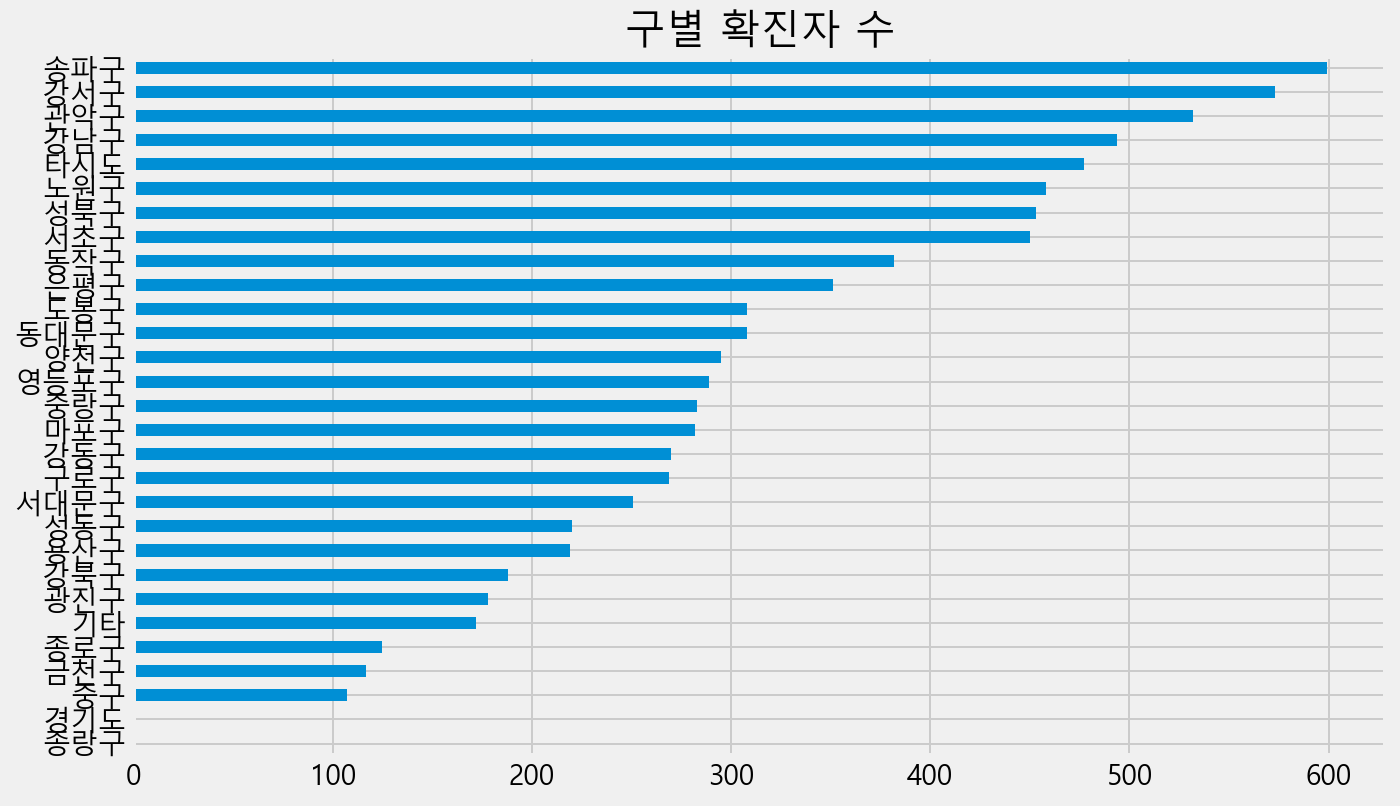

In [231]:
# 구별 확진자의 수를 시각화 합니다.
gu_count.sort_values().plot.barh(title = "구별 확진자 수", figsize = (10, 6), grid = True)

In [232]:
# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있습니다.
# 거주지 별로 서울시에 해당되는 데이터만 따로 가져옵니다.
gu

['송파구',
 '강서구',
 '관악구',
 '강남구',
 '노원구',
 '성북구',
 '서초구',
 '동작구',
 '은평구',
 '도봉구',
 '동대문구',
 '양천구',
 '영등포구',
 '중랑구',
 '마포구',
 '강동구',
 '구로구',
 '서대문구',
 '성동구',
 '용산구',
 '강북구',
 '광진구',
 '종로구',
 '금천구',
 '중구',
 '종랑구']

In [233]:
gu = gu_count.index.tolist()
gu.remove("경기도")
gu.remove("타시도")
gu.remove("기타")
gu

['송파구',
 '강서구',
 '관악구',
 '강남구',
 '노원구',
 '성북구',
 '서초구',
 '동작구',
 '은평구',
 '도봉구',
 '동대문구',
 '양천구',
 '영등포구',
 '중랑구',
 '마포구',
 '강동구',
 '구로구',
 '서대문구',
 '성동구',
 '용산구',
 '강북구',
 '광진구',
 '종로구',
 '금천구',
 '중구',
 '종랑구']

In [234]:
# 거주지가 서울이 아닌 지역을 따로 추출합니다.
# 집합 자료형 set, 집합 연산 가능

set(gu_count.index) - set(gu)

{'경기도', '기타', '타시도'}

In [235]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환합니다.
# reset_index 하면 데이터프레임화 됨

df_gu = gu_count.reset_index()
df_gu.columns = ["구", "거주지"]
df_gu

,구,거주지
0,송파구,599
1,강서구,573
2,관악구,532
3,강남구,494
4,타시도,477
5,노원구,458
6,성북구,453
7,서초구,450
8,동작구,382
9,은평구,351


In [236]:
# isin([찾고자 하는 리스트값])
# ~표시는 not을 의미
df_gu[~df_gu["구"].isin(gu)]

,구,거주지
4,타시도,477
23,기타,172
27,경기도,1


In [237]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해 보기 위해
# "지역"이라는 새로운 컬럼을 만들어 서울지역이 아니라면 "타지역" 이라는 값을 넣어줍니다. 
# .loc[행인덱스]
# .loc[행, 열]
# .loc[조건, 열]
# df.loc[~df["거주지"].isin(gu)]
# df.loc[df["지역"].isnull(), "지역"] = "타지역"
df_gu.loc[df_gu["구"] == "종랑구", "구"] = "중랑구"
df_gu.loc[df_gu["구"] == "타시도", "구"] = "타시도"
df_gu.loc[df_gu["구"] == "기타", "구"] = "타시도"
df_gu.loc[df_gu["구"] == "경기도", "구"] = "타시도"

In [238]:
# 위의 방법으로 할수도 있고 아래의 방법으로 만들수도 있습니다.
# 함수 혹은 익명함수를 사용하는 방법으로 "타지역" 값을 만들 수도 있습니다.
df["지역"] = df["거주지"]

df.loc[df["지역"] == "종랑구", "지역"] = "중랑구"
df.loc[df["지역"] == "타시도", "지역"] = "타시도"
df.loc[df["지역"] == "기타", "지역"] = "타시도"
df.loc[df["지역"] == "경기도", "지역"] = "타시도"

<AxesSubplot:title={'center':'구별 확진자 수'}>

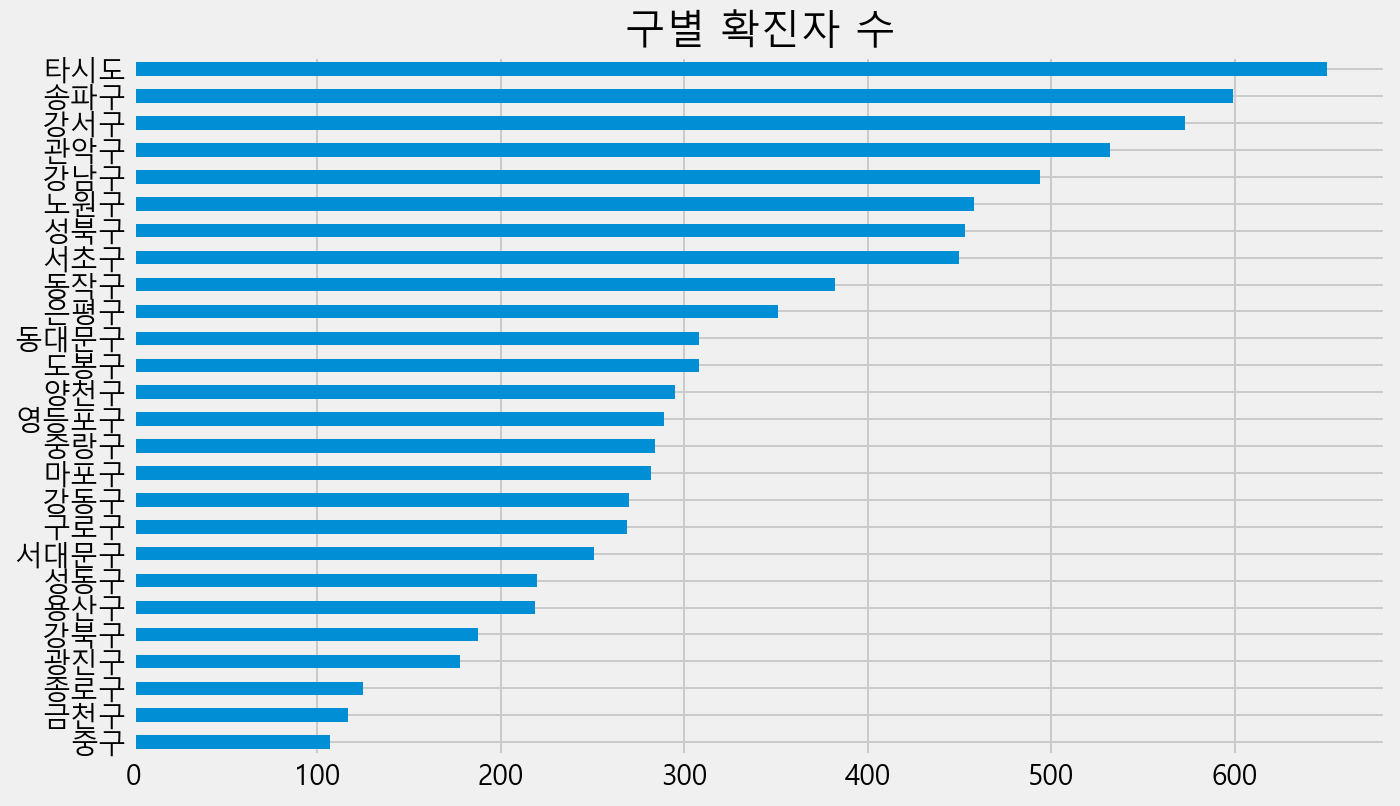

In [239]:
# "지역" 컬럼으로 확진자 빈도수를 구합니다.
# gu_etc_count
df["지역"].value_counts().sort_values().plot.barh(figsize=(10,6), title="구별 확진자 수")

## 접촉력

In [240]:
# 접촉력 빈도수를 구합니다.
df["접촉력"].value_counts().head(20)

확인 중                       1499
기타 확진자 접촉                  1490
성북구 사랑제일교회 관련               641
해외 접촉 추정                    404
타시도 확진자 접촉                  373
강서구 댄스교습관련 시설               146
이태원 클럽 관련                   139
8.15서울도심집회                  126
리치웨이 관련                     119
해외 유입                       111
동대문구 에이스희망케어센터 관련            71
도봉구 다나병원                     68
서초구 사우나 관련                   67
강남구 헬스장 관련                   66
서초구 사우나Ⅱ 관련                  60
동대문구 고등학교(마포구 홍대 새교회관련)      60
구로구 콜센터 관련                   60
노원구 빛가온교회 관련                 46
강남구 럭키사우나 관련                 45
성북구 체대입시 관련                  43
Name: 접촉력, dtype: int64

In [241]:
# 접촉력의 unique 값만 구합니다.
df["접촉력"].unique()

array(['기타 확진자 접촉', '확인 중', '동작구 임용단기학원 관련', '동대문구 체육시설 관련',
       '강서구 댄스교습관련 시설', '타시도 확진자 접촉', '해외 유입', '서초구 건설회사 관련', '소규모 지인모임',
       '서초구 사우나Ⅱ 관련', '강서구 댄스교습관련 시설 ', '동작구 임용단기고시 관련', '어플소모임 관련',
       '마포구 홍대새교회 관련', '강서구 댄스교습관련 시설(서울대효병원)', '강서구 가족 관련',
       '동창 운동 모임 관련', '노원구 가족관련', '강남구 연기학원 관련', '중랑구 실내 체육시설 Ⅱ 관련',
       '노원구청 관련', '수도권산악회(11월) 관련 ', '중구 제조업공장 관련', '연세대 학생 관련',
       '서대문구 요양시설 관련', '송파구 사우나 관련', '마포구 소재 노인복지시설 관련', '강남구 음식점Ⅱ 관련',
       '삼성서울병원 관련', '강서구 경로당 관련', '서초구 사우나 관련', '강서구 소재 병원관련(11월)',
       '지인-가족전파', '중구 소재 보람상조회사 관련', '어름 소모임 관련', '어플 소모임 관련',
       '중랑구 체육시설 Ⅱ 관련', '용산구 국군복지단 관련', '중구 소재 상조회사 관련', '성동구 소재 PC방 관련',
       '동작구 모조카페 관련', '마포구 홍대세교회관련', '수도권 지인모임(11월) 관련', '중구 교회 관련',
       '중랑구 실내체육시설 관련', '마포구 홍대세교회 관련', '동대문구 고등학교(마포구 홍대 새교회관련)',
       '노원구 의료기관 관련', '강남구 헬스장 관련', '성북구 가족 관련', '송파구 잠언의료기(강남구CJ텔레닉스)',
       '수도권산악회(11월) 관련', '동작구 교회 기도처 관련', '동작구 모조카페', '성동구 금호노인요양원 관련',
       '동대문구 에이스희망케어센터 관련', '서울대병원 발생 관련', 

In [201]:
# "확인" 이 들어가는 접촉력만 찾습니다.
# str 형태의 데이터타입에서 쓸 수 있는 메쏘드를 .str로 불러올 수 있음
df[df["접촉력"].str.contains("확인")]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,주,월,지역,구
4694,3958,20163,8.31.,양천구,-,확인 중,퇴원,2020-08-31,36,8,양천구,NaN
4695,3957,20141,8.31.,은평구,-,확인 중,퇴원,2020-08-31,36,8,은평구,NaN
4696,3956,20159,8.31.,용산구,-,확인 중,퇴원,2020-08-31,36,8,용산구,NaN
4700,3952,20130,8.31.,도봉구,-,확인 중,퇴원,2020-08-31,36,8,도봉구,NaN
4706,3946,20039,8.31.,타시도,-,확인 중,퇴원,2020-08-31,36,8,타시도,타시도
...,...,...,...,...,...,...,...,...,...,...,...,...
8596,56,1768,2.25.,은평구,-,확인중,퇴원,2020-02-25,9,2,은평구,NaN
8610,42,1370,2.25.,송파구,-,확인중,퇴원,2020-02-25,9,2,송파구,NaN
8613,39,924,2.25.,금천구,-,확인중,퇴원,2020-02-25,9,2,금천구,NaN
8614,38,907,2.25.,타시도,-,확인중,퇴원,2020-02-25,9,2,타시도,타시도


In [67]:
# '확인 중', '확인중' => "확인 중" 으로 변경합니다.
# 판다스에서는 넘파이의 |, & 연산을 씀
df.loc[df["접촉력"].str.contains("확인|조사"), "접촉력"] = "확인 중"

In [68]:
# "확인" 이 들어가는 접촉력만 찾습니다.
df[df["접촉력"].str.contains("확인")]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,지역
1,8651,33756,11.28.,타시도,-,확인 중,NaN,2020-11-28,11,48,타시도
5,8647,33769,11.28.,서초구,-,확인 중,NaN,2020-11-28,11,48,서초구
10,8642,33764,11.28.,서초구,-,확인 중,NaN,2020-11-28,11,48,서초구
18,8634,33733,11.28.,양천구,-,확인 중,NaN,2020-11-28,11,48,양천구
35,8617,33726,11.28.,강남구,-,확인 중,NaN,2020-11-28,11,48,강남구
...,...,...,...,...,...,...,...,...,...,...,...
8596,56,1768,2.25.,은평구,-,확인 중,퇴원,2020-02-25,2,9,은평구
8610,42,1370,2.25.,송파구,-,확인 중,퇴원,2020-02-25,2,9,송파구
8613,39,924,2.25.,금천구,-,확인 중,퇴원,2020-02-25,2,9,금천구
8614,38,907,2.25.,타시도,-,확인 중,퇴원,2020-02-25,2,9,타시도


<AxesSubplot:>

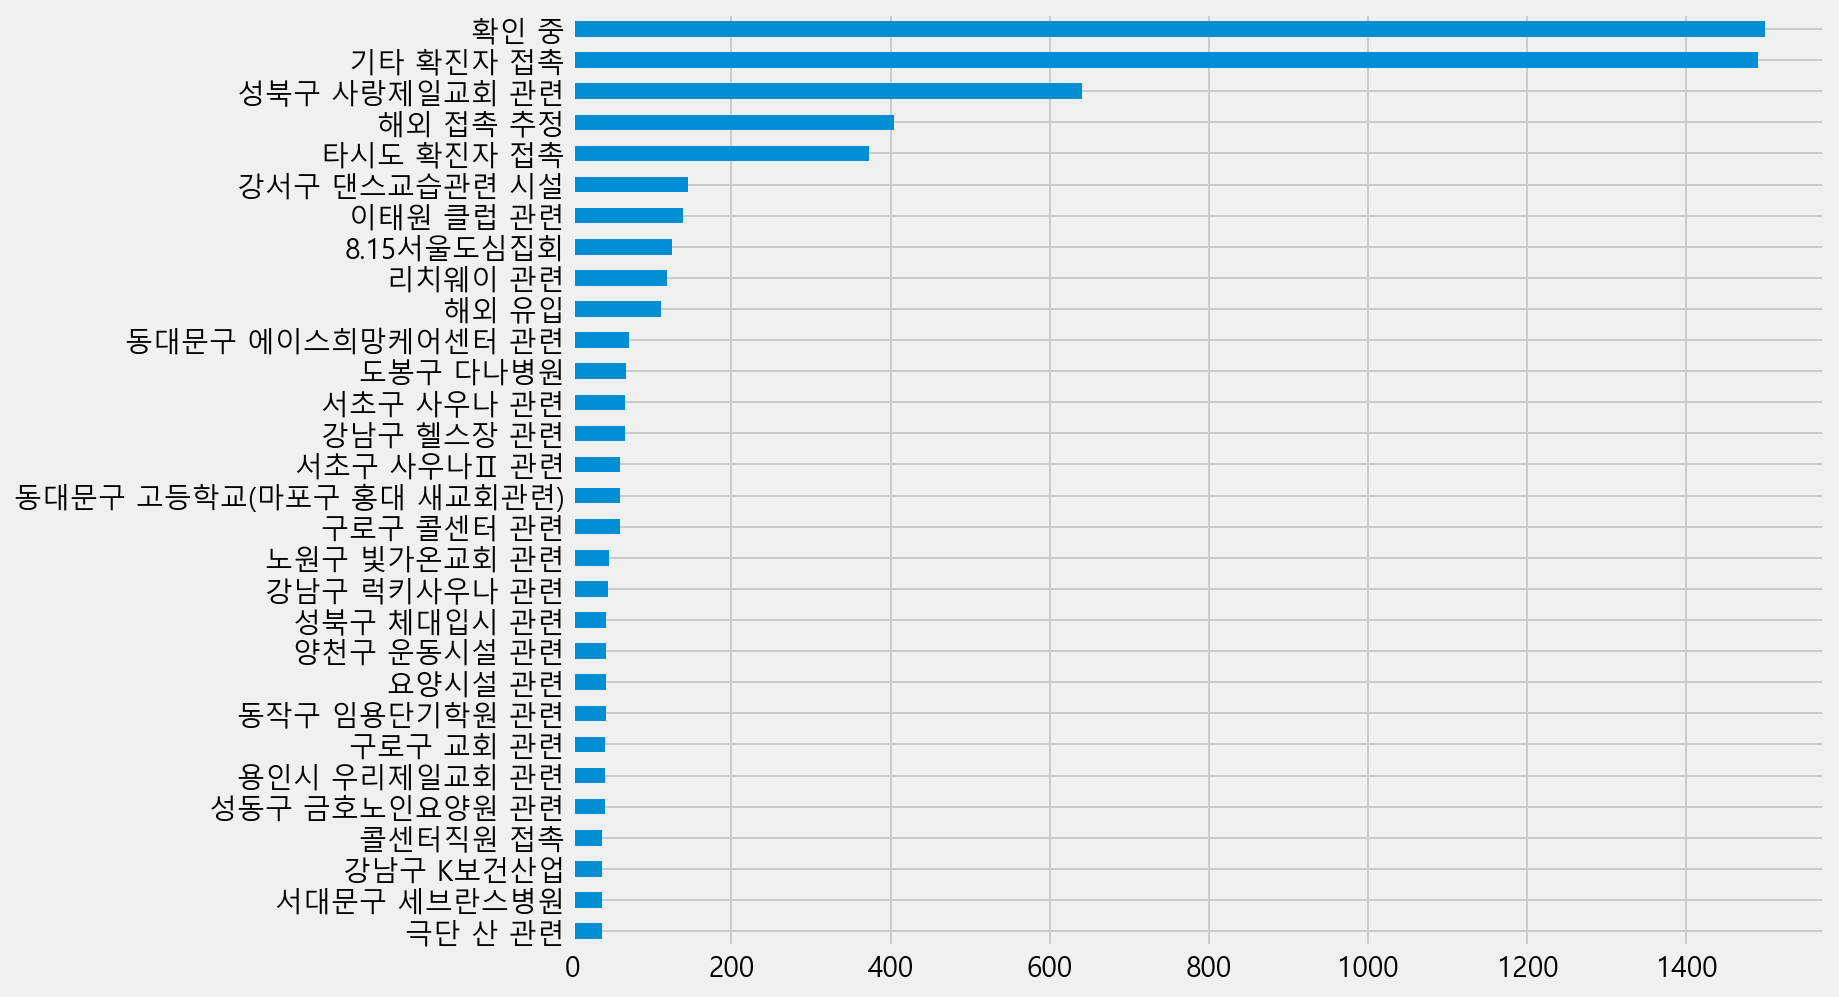

In [246]:
# 접촉력 빈도수를 시각화 합니다.
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(30)
contact_count_top.plot.barh(figsize= (10, 8))

In [256]:
# 상위 15개만 구합니다.
top_contact = contact_count
top_contact

확인 중             1499
기타 확진자 접촉        1490
성북구 사랑제일교회 관련     641
해외 접촉 추정          404
타시도 확진자 접촉        373
                 ... 
#7914 접촉            1
동작구 모조카페 관련         1
#10115 접촉           1
수도권 지인모임관련          1
신천지대구교회 관련          1
Name: 접촉력, Length: 407, dtype: int64

In [248]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해옵니다.
top_contact.index

Index(['확인 중', '기타 확진자 접촉', '성북구 사랑제일교회 관련', '해외 접촉 추정', '타시도 확진자 접촉',
       '강서구 댄스교습관련 시설', '이태원 클럽 관련', '8.15서울도심집회', '리치웨이 관련', '해외 유입',
       '동대문구 에이스희망케어센터 관련', '도봉구 다나병원', '서초구 사우나 관련', '강남구 헬스장 관련',
       '서초구 사우나Ⅱ 관련'],
      dtype='object')

In [249]:
# 위에서 구한 top_contact 에 해당되는 데이터만 isin 으로 가져옵니다.
top_group = df[df['접촉력'].isin(top_contact.index)]
top_group

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,지역,월일
0,8652,33532,11.28.,서대문구,-,기타 확진자 접촉,NaN,2020-11-28,11,48,서대문구,11-28
1,8651,33756,11.28.,타시도,-,확인 중,NaN,2020-11-28,11,48,타시도,11-28
3,8649,33776,11.28.,은평구,-,기타 확진자 접촉,NaN,2020-11-28,11,48,은평구,11-28
4,8648,33768,11.28.,서초구,-,기타 확진자 접촉,NaN,2020-11-28,11,48,서초구,11-28
5,8647,33769,11.28.,서초구,-,확인 중,NaN,2020-11-28,11,48,서초구,11-28
...,...,...,...,...,...,...,...,...,...,...,...,...
8613,39,924,2.25.,금천구,-,확인 중,퇴원,2020-02-25,2,9,금천구,02-25
8614,38,907,2.25.,타시도,-,확인 중,퇴원,2020-02-25,2,9,타시도,02-25
8617,35,870,2.25.,은평구,-,확인 중,퇴원,2020-02-25,2,9,은평구,02-25
8620,32,794,2.23.,송파구,-,타시도 확진자 접촉,퇴원,2020-02-23,2,8,송파구,02-23


In [252]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.
top_group.groupby(['접촉력', '월']).size().unstack().fillna(0).astype(int)

월,2,3,4,5,6,7,8,9,10,11
접촉력,,,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,113,13,0,0
강남구 헬스장 관련,0,0,0,0,0,0,0,0,18,48
강서구 댄스교습관련 시설,0,0,0,0,0,0,0,0,0,146
기타 확진자 접촉,0,0,0,0,0,1,422,309,116,642
도봉구 다나병원,0,0,0,0,0,0,0,33,35,0
동대문구 에이스희망케어센터 관련,0,0,0,0,0,0,0,0,10,61
리치웨이 관련,0,0,0,0,119,0,0,0,0,0
서초구 사우나 관련,0,0,0,0,0,0,0,0,0,67
서초구 사우나Ⅱ 관련,0,0,0,0,0,0,0,0,0,60


### 감염경로 불명

In [255]:
# "접촉력" 이 "확인 중"인 데이터만 구합니다.

df_unknown = df[df["접촉력"].str.contains("확인 중")]
df_unknown

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,지역,월일
1,8651,33756,11.28.,타시도,-,확인 중,NaN,2020-11-28,11,48,타시도,11-28
5,8647,33769,11.28.,서초구,-,확인 중,NaN,2020-11-28,11,48,서초구,11-28
10,8642,33764,11.28.,서초구,-,확인 중,NaN,2020-11-28,11,48,서초구,11-28
18,8634,33733,11.28.,양천구,-,확인 중,NaN,2020-11-28,11,48,양천구,11-28
35,8617,33726,11.28.,강남구,-,확인 중,NaN,2020-11-28,11,48,강남구,11-28
...,...,...,...,...,...,...,...,...,...,...,...,...
8596,56,1768,2.25.,은평구,-,확인 중,퇴원,2020-02-25,2,9,은평구,02-25
8610,42,1370,2.25.,송파구,-,확인 중,퇴원,2020-02-25,2,9,송파구,02-25
8613,39,924,2.25.,금천구,-,확인 중,퇴원,2020-02-25,2,9,금천구,02-25
8614,38,907,2.25.,타시도,-,확인 중,퇴원,2020-02-25,2,9,타시도,02-25


<AxesSubplot:xlabel='월,주'>

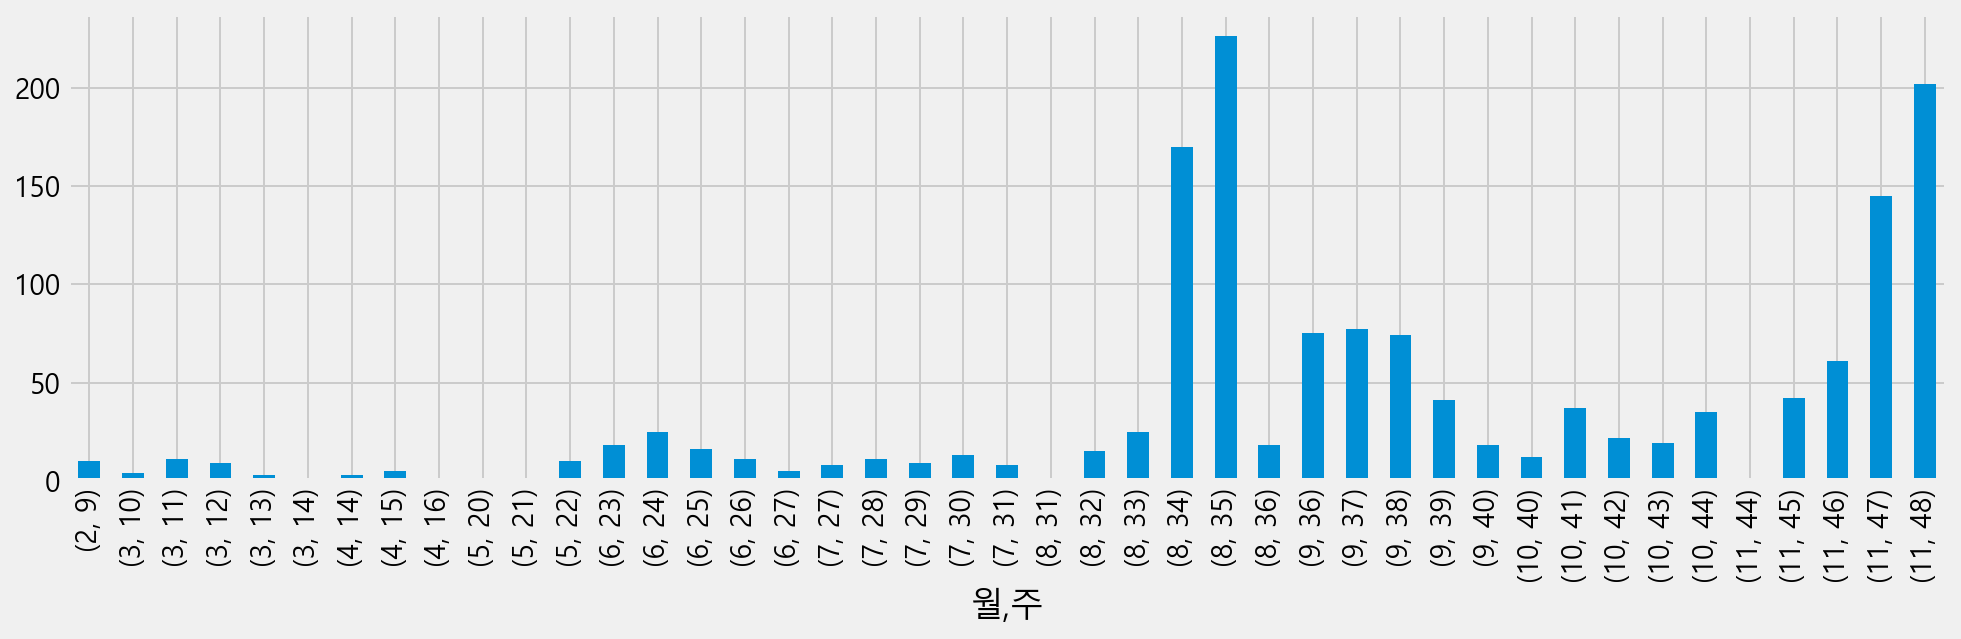

In [263]:
# 감염경로 불명이 어느정도인지 봅니다.
unknown_weekly_case = df_unknown.groupby(["월", "주"])["연번"].count()
unknown_weekly_case.plot.bar(figsize = (15,4))

In [268]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진수"]
all_weekly_case.head()

,전체확진수
48,1027
35,925
34,913
47,811
36,458


In [270]:
# 감염경로 불명 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
unknown_weekly_case = df_unknown["주"].value_counts().to_frame()
unknown_weekly_case.columns = ["불명확진수"]
unknown_weekly_case.head()

,불명확진수
35,226
48,202
34,170
47,145
36,93


In [274]:
# all_weekly_case 와 unknown_weekly_case 를 비교해 봅니다.
# 데이터프레임일 때만 merge 가능
unknown_case = all_weekly_case.merge(unknown_weekly_case, left_index = True, right_index = True)
unknown_case = unknown_case.sort_index()

<AxesSubplot:>

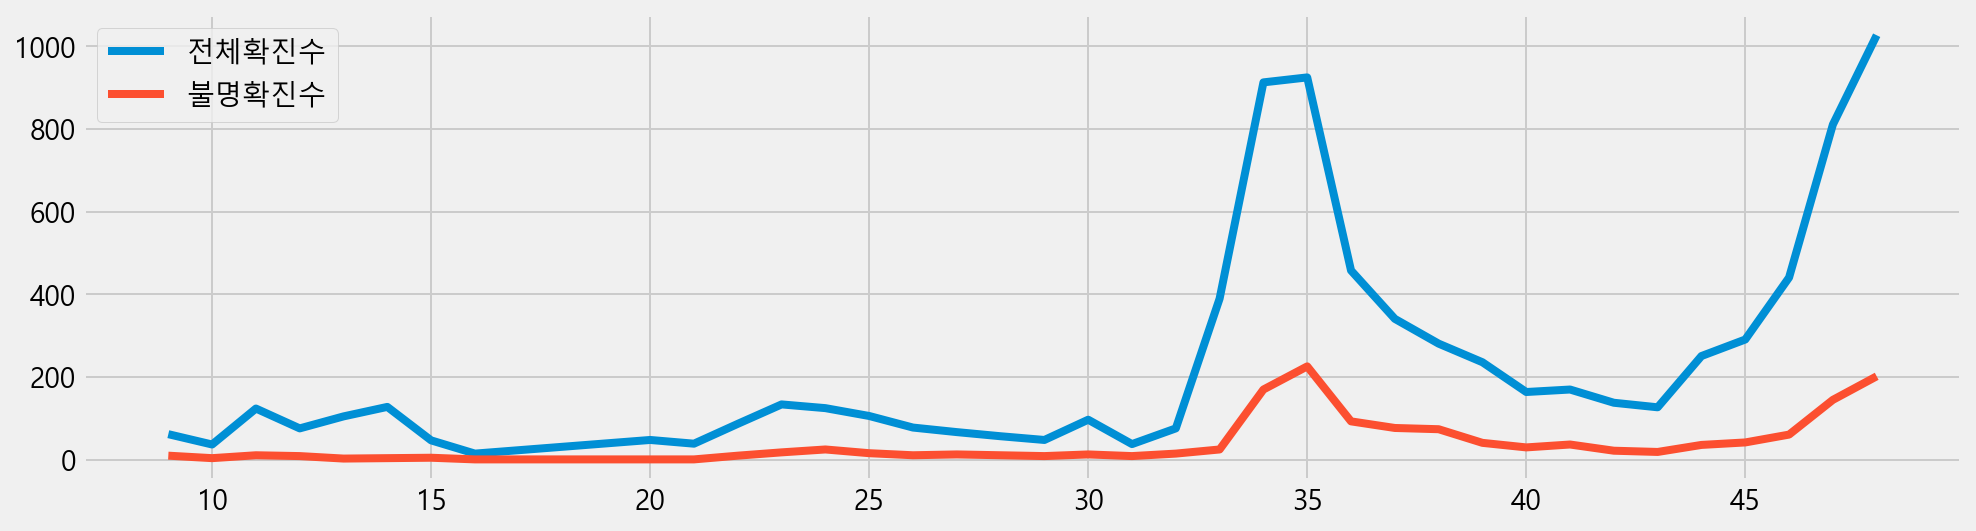

In [276]:
# 위에서 구한 결과를 시각화 합니다.
unknown_case.plot(figsize = (15, 4))

<AxesSubplot:>

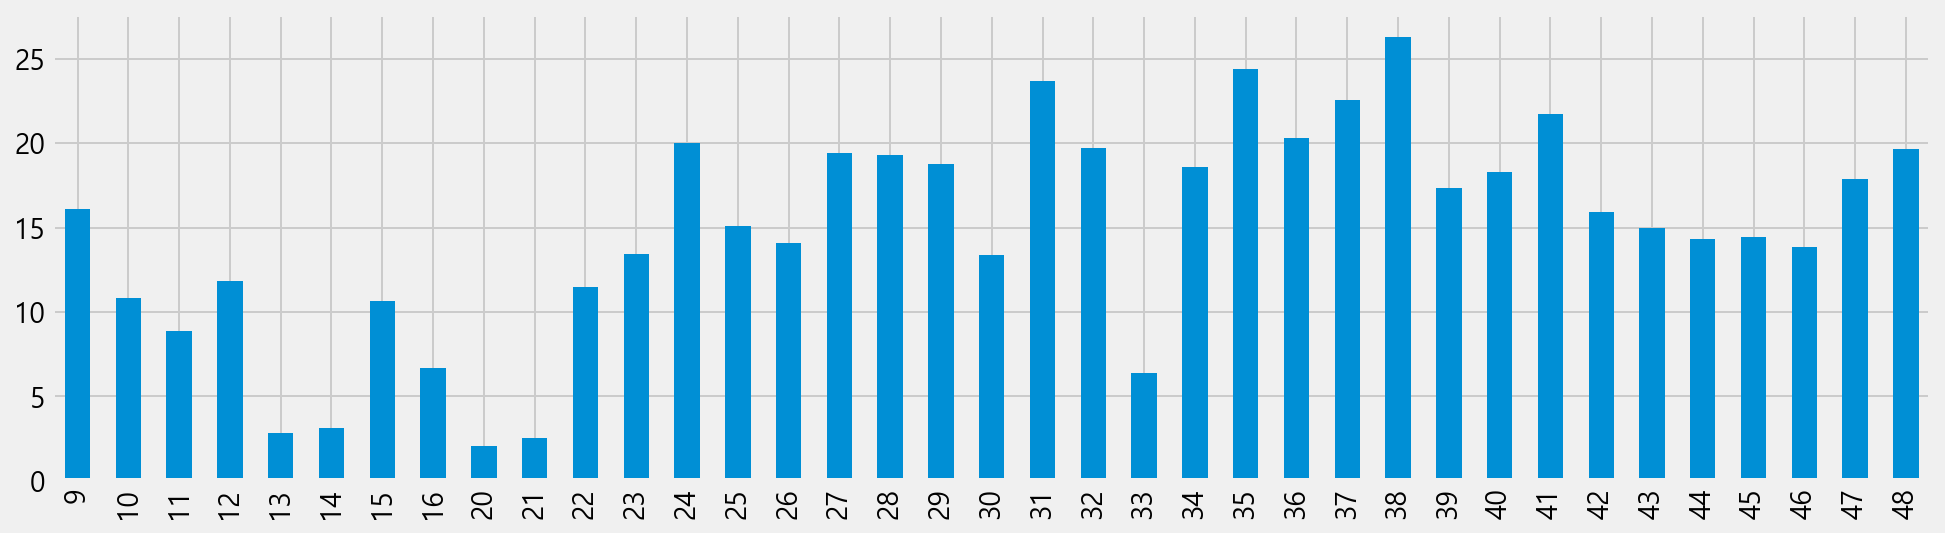

In [283]:
# 감염경로 "확인 중"의 주별 비율

unknown_case["확인중비율"] = unknown_case["불명확진수"] / unknown_case["전체확진수"] * 100
unknown_case["확인중비율"].plot.bar(figsize = (15, 4))

In [286]:
# 가장 많은 전파가 일어난 번호
# 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
# regular expression 라이브러리
import re
re.sub("[^0-9]", "", "7265 접촉(추정)")

'7265'

In [287]:
# 함수 만들기
def get_number(text):
    return re.sub("[^0-9]", "", text)

get_number("7265 접촉(추정)")

'7265'

In [290]:
# map 통해 접촉번호 컬럼 만들기
df["접촉번호"] = df["접촉력"].map(get_number)
contact = df["접촉번호"].value_counts().reset_index()
contact.head()

,index,접촉번호
0,,8364
1,815,126
2,11,69
3,9,4
4,9734,4


In [297]:
# 접촉번호 없는 0번행 삭제
df_contact = contact.drop(0)
df_contact = df_contact.head(10)
df_contact

,index,접촉번호
1,815,126
2,11,69
3,9,4
4,9734,4
5,6,4
6,14483,3
7,8486,3
8,8791,3
9,780,3
10,8271,3


In [296]:
top_contact_no = df_contact["index"]
df[df["접촉번호"].isin(top_contact_no)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,지역,월일,접촉번호
162,8490,33066,11.27.,동대문구,-,수도권산악회(11월) 관련,NaN,2020-11-27,11,48,동대문구,11-27,11
430,8222,32634,11.26.,양천구,-,강서구 소재 병원관련(11월),NaN,2020-11-26,11,48,양천구,11-26,11
623,8029,32050,11.25.,영등포구,-,강서구 소재 병원관련(11월),NaN,2020-11-25,11,48,영등포구,11-25,11
640,8012,32025,11.25.,양천구,-,강서구 소재 병원관련(11월),NaN,2020-11-25,11,48,양천구,11-25,11
820,7832,31457,11.24.,송파구,-,수도권 지인모임(11월) 관련,NaN,2020-11-24,11,48,송파구,11-24,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8619,33,797,2.24.,송파구,-,#780 접촉(추정),퇴원,2020-02-24,2,9,송파구,02-24,780
8635,17,83,2.20.,종로구,-,#6 접촉(추정),퇴원,2020-02-20,2,8,종로구,02-20,6
8642,10,21,2.5.,성북구,-,#6 접촉,퇴원,2020-02-05,2,6,성북구,02-05,6
8645,7,11,1.31.,종로구,-,#6 접촉,퇴원,2020-01-31,1,5,종로구,01-31,6


In [303]:
df[df["연번"] == 815]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,지역,월일,접촉번호
7837,815,11300,5.27.,송파구,-,부천시 쿠팡 관련,퇴원,2020-05-27,5,22,송파구,05-27,


## 퇴원현황

In [306]:
df["퇴원현황"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8647     퇴원
8648     퇴원
8649     퇴원
8650     퇴원
8651     퇴원
Name: 퇴원현황, Length: 8652, dtype: object

## 퇴원, 사망여부

In [313]:
df.loc[df["퇴원현황"].isnull(), "퇴원현황"] = "확인 중"

array([nan, '사망', '퇴원'], dtype=object)

In [329]:
df["퇴원현황"].unique()

array(['확인 중', '사망', '퇴원'], dtype=object)

In [335]:
# 퇴원현황 컬럼을 통해 퇴원과 사망 컬럼을 새로 만듭니다.
# 또, 어느 병원에 조치되었는지도 병원 컬럼을 만들어서 담습니다.
df["퇴원"] = df["퇴원현황"].str.contains("퇴원")
df["사망"] = df["퇴원현황"].str.contains("사망")
df["확인 중"] = df["퇴원현황"].str.contains("확인 중")

In [ ]:
# # 병원 컬럼 만들기
# df["병원"] = df["조치사항"].str.replace("\(퇴원\)", "")
# df["병원"] = df["병원"].str.replace("\(사망\)", "")

In [331]:
# 데이터 수집 시점에서 퇴원하지 못한 환자수
df["퇴원"].value_counts()

True     6529
False    2123
Name: 퇴원, dtype: int64

In [332]:
# 퇴원여부 빈도수에 대한 비율을 구합니다.
df["퇴원"].value_counts(normalize = True) * 100

True     75.462321
False    24.537679
Name: 퇴원, dtype: float64

In [333]:
# 사망여부에 따른 빈도수를 구합니다.
df["사망"].value_counts()

False    8560
True       92
Name: 사망, dtype: int64

In [336]:
# 사망 여부에 따른 빈도수의 비율을 구합니다.
df["사망"].value_counts(normalize = True) * 100

False    98.936662
True      1.063338
Name: 사망, dtype: float64

In [337]:
df["확인 중"].value_counts(normalize = True) * 100

False    76.525659
True     23.474341
Name: 확인 중, dtype: float64

In [340]:
# 가장 오래 입원해있는 환자
df[(df["퇴원"] == False) & (df["사망"] == False) & (df["지역"] != "타지역")].tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,지역,월일,접촉번호,퇴원,사망,확인 중
3917,4735,22348,9.14.,구로구,-,확인 중,확인 중,2020-09-14,9,38,구로구,09-14,,False,False,True
3919,4733,22352,9.14.,종로구,-,기타 확진자 접촉,확인 중,2020-09-14,9,38,종로구,09-14,,False,False,True
4050,4602,22036,9.11.,관악구,-,확인 중,확인 중,2020-09-11,9,37,관악구,09-11,,False,False,True
4453,4199,20781,9.03.,타시도,-,송파구 소재병원,확인 중,2020-09-03,9,36,타시도,09-03,,False,False,True
4458,4194,20833,9.03.,은평구,-,성북구 사랑제일교회 관련,확인 중,2020-09-03,9,36,은평구,09-03,,False,False,True


In [ ]:
# # 병원 관련내용 분석해보기
# df["병원"].describe()
# df["병원"].nunique()

# hospital_index = df["병원"].value_counts()
# hospital_index.sort_values().plot.barh(figsize = (8, 12))
# top_hospital_index = hospital_count.head(10).index

# hospital_gu = df.groupby(["지역", "병원"])["연번"].count().unstack()
# hospital_gu.fillna(0).iloc[:8, -8:]

# hospital_gu.loc[["강남구", "강서구"], ["강남성심병원", "서울의료원"]]
# hospital_gu.loc[["강남구", "강서구"], top_hospital_index]

# # pandas style 적용하기 (히트맵)
# hospital_gu_heatmap = hospital_gu.fillna(0).astype(int)
# hospital_gu_heatmap[top_hospital_index].style.background_gradient()
# hospital_gu_heatmap[top_hospital_index].T.style.background_gradient()

## 여행력

In [410]:
# "해외" 라는 컬럼을 만들어 데이터를 전처리 합니다.
# "여행력"에 "-" 문자가 들어가 있으면 결측치로 처리합니다.
df["해외"] = df["여행력"]
df["해외"] = df["해외"].str.strip()
df["해외"] = df["해외"].replace("-", np.nan)
df["해외"].unique()

array([nan, '미국', '폴란드', '캐나다', '가봉', '터키', '에티오피아', '러시아', '모로코', '브라질',
       '스페인', '사우디아라비아', '인도네시아', '벨기에', '이탈리아', '스웨덴', '우즈베키스탄', '독일',
       '인도', '쿠웨이트', '크로아티아', '중국', '미얀마', '28238', '케냐', '수단', '루마니아',
       '헝가리', '프랑스', '핀란드', '가나', '튀니지', '아랍에미리트', '네팔', '방글라데시', '에디오피아',
       '네덜란드', '키르기스스탄', '이란', '체코', '필리핀', '일본', '요르단', '우간다', '몰타',
       '영국', '카타르', '우크라이나', '에콰도르', '키르기즈스탄', '파라과이', '멕시코, 미국', '카자흐스탄',
       '이집트', '21263', '베트남', '멕시코', '홍콩', '이라크', '모로코, 터키', '나이지리아',
       '미국, 멕시코', '페루', 'UAE', '파키스탄', '아일랜드', '콩코, 프랑스', '페루, 미국',
       '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우', '호주, 인도네시아', '포르투칼',
       '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아', '미국, 브라질', '태국',
       '아르헨티나, 볼리비아, 브라질', '말레이시아', '필리핀, 마닐라', '브라질, 아르헨티아, 칠레, 볼리비아',
       '프랑스, 독일', '미국, 캐나다', '스페인, 카타르', '이탈리아, 프랑스',
       '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아', '영국, 프랑스',
       '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스', '이탈리아, 독일, 홍콩',
       '중국 청도', '우한교민', '중국 우한시', '싱가포르', '우

In [411]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수
df["해외"].describe()

count     546
unique     97
top        미국
freq      177
Name: 해외, dtype: object

In [412]:
df["해외"].value_counts()

미국                           177
영국                            50
필리핀                           25
우즈베키스탄                        18
인도                            15
                            ... 
나이지리아                          1
모로코, 프랑스, 오스트리아                1
키르기즈스탄                         1
콩코, 프랑스                        1
체코, 헝가리, 오스트리아, 이탈리아, 프랑스      1
Name: 해외, Length: 97, dtype: int64

### 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [413]:
# "해외" 컬럼의 값이 결측치가 아닌 데이터만 가져와서 
# df_oversea 라는 새로운 데이터프레임에 담습니다.
df_oversea = df[df["해외"].notnull()].copy()
df_oversea.shape

(546, 17)

In [414]:
# 중복되는 지역명이 있는지 확인합니다.
df_oversea["해외"].unique()

array(['미국', '폴란드', '캐나다', '가봉', '터키', '에티오피아', '러시아', '모로코', '브라질',
       '스페인', '사우디아라비아', '인도네시아', '벨기에', '이탈리아', '스웨덴', '우즈베키스탄', '독일',
       '인도', '쿠웨이트', '크로아티아', '중국', '미얀마', '28238', '케냐', '수단', '루마니아',
       '헝가리', '프랑스', '핀란드', '가나', '튀니지', '아랍에미리트', '네팔', '방글라데시', '에디오피아',
       '네덜란드', '키르기스스탄', '이란', '체코', '필리핀', '일본', '요르단', '우간다', '몰타',
       '영국', '카타르', '우크라이나', '에콰도르', '키르기즈스탄', '파라과이', '멕시코, 미국', '카자흐스탄',
       '이집트', '21263', '베트남', '멕시코', '홍콩', '이라크', '모로코, 터키', '나이지리아',
       '미국, 멕시코', '페루', 'UAE', '파키스탄', '아일랜드', '콩코, 프랑스', '페루, 미국',
       '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우', '호주, 인도네시아', '포르투칼',
       '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아', '미국, 브라질', '태국',
       '아르헨티나, 볼리비아, 브라질', '말레이시아', '필리핀, 마닐라', '브라질, 아르헨티아, 칠레, 볼리비아',
       '프랑스, 독일', '미국, 캐나다', '스페인, 카타르', '이탈리아, 프랑스',
       '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아', '영국, 프랑스',
       '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스', '이탈리아, 독일, 홍콩',
       '중국 청도', '우한교민', '중국 우한시', '싱가포르', '우한 교민'

### 텍스트 데이터 다루기
[Working with text data — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern)

In [415]:
# 유럽 지역을 방문했다면 유럽이라고 바꿔주기 위해 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
# 판다스의 시리즈가 아닌 파이썬의 문자열이기 때문에 str.replace() 대신 replace()를 사용
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드, 핀란드, 벨기에, 네덜란드, 스웨덴, 포르투, 크로아티아, 우크라이나, 루마니아, 몰타"
europe = europe.replace(", ", "|")
df_oversea[df_oversea["해외"].str.contains(europe)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,지역,월일,접촉번호,퇴원,사망,확인 중,해외
554,8098,32200,11.25.,광진구,폴란드,해외 유입,확인 중,2020-11-25,11,48,광진구,11-25,,False,False,True,폴란드
776,7876,31604,11.24.,강남구,터키,해외 유입,확인 중,2020-11-24,11,48,강남구,11-24,,False,False,True,터키
832,7820,31607,11.24.,강남구,터키,해외 유입,확인 중,2020-11-24,11,48,강남구,11-24,,False,False,True,터키
1064,7588,30897,11.22.,송파구,모로코,해외 유입,확인 중,2020-11-22,11,47,송파구,11-22,,False,False,True,모로코
1065,7587,30891,11.22.,송파구,폴란드,해외 유입,확인 중,2020-11-22,11,47,송파구,11-22,,False,False,True,폴란드
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8536,116,6999,3.7.,서초구,"스페인, 프랑스",해외 접촉,퇴원,2020-03-07,3,10,서초구,03-07,,True,False,False,"스페인, 프랑스"
8549,103,5666,3.4.,용산구,"이탈리아, 독일, 홍콩",해외 접촉,퇴원,2020-03-04,3,10,용산구,03-04,,True,False,False,"이탈리아, 독일, 홍콩"
8567,85,3681,2.29.,강남구,이탈리아,해외 접촉,퇴원,2020-02-29,2,9,강남구,02-29,,True,False,False,이탈리아
8577,75,2468,2.27.,강남구,"이탈리아, 프랑스",해외 접촉,퇴원,2020-02-27,2,9,강남구,02-27,,True,False,False,"이탈리아, 프랑스"


In [416]:
# 남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루, 에콰도르, 파라과이"
south_america = south_america.replace(", ", "|")
df_oversea[df_oversea["해외"].str.contains(south_america)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,지역,월일,접촉번호,퇴원,사망,확인 중,해외
1439,7213,29786,11.19.,동작구,브라질,해외 유입,확인 중,2020-11-19,11,47,동작구,11-19,,False,False,True,브라질
3120,5532,24590,10.10.,강동구,브라질,해외 유입,퇴원,2020-10-10,10,41,강동구,10-10,,True,False,False,브라질
4152,4500,21668,9.09.,동작구,에콰도르,해외 접촉 추정,퇴원,2020-09-09,9,37,동작구,09-09,,True,False,False,에콰도르
4337,4315,21199,9.06.,동작구,파라과이,해외 접촉 추정,퇴원,2020-09-06,9,36,동작구,09-06,,True,False,False,파라과이
4627,4025,20347,9.01.,강남구,"멕시코, 미국",해외 접촉 추정,퇴원,2020-09-01,9,36,강남구,09-01,,True,False,False,"멕시코, 미국"
6949,1703,14677,8.11.,관악구,에콰도르,해외 접촉 추정,퇴원,2020-08-11,8,33,관악구,08-11,,True,False,False,에콰도르
6978,1674,14591,8.8.,기타,멕시코,해외 접촉 추정,퇴원,2020-08-08,8,32,타시도,08-08,,True,False,False,멕시코
7073,1579,14202,7.27.,타시도,멕시코,해외 접촉 추정,퇴원,2020-07-27,7,31,타시도,07-27,,True,False,False,멕시코
7174,1478,13791,7.20.,서대문구,"미국, 멕시코",해외 접촉 추정,퇴원,2020-07-20,7,30,서대문구,07-20,,True,False,False,"미국, 멕시코"
7272,1380,13206,7.07.,마포구,페루,해외 접촉 추정,퇴원,2020-07-07,7,28,마포구,07-07,,True,False,False,페루


In [417]:
# 중복되는 국가나 지역을 특정 텍스트로 변경해서 그룹화 해서 빈도수를 세어볼 예정입니다.
# .str.contains 와 .loc 를 사용해서 전처리 합니다.
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = "남미"
df_oversea.loc[df_oversea["해외"].str.contains("중국|우한|홍콩|일본"), "해외"] = "동북아"
df_oversea.loc[df_oversea["해외"].str.contains("인도|파키스탄|네팔|방글라데시"), "해외"] = "서남아"
df_oversea.loc[df_oversea["해외"].str.contains("미국|캐나다"), "해외"] = "북미"
df_oversea.loc[df_oversea["해외"].str.contains("필리핀|태국|베트남|미얀마|말레이시아|싱가포르|인도네시아"), "해외"] = "동남아"
df_oversea.loc[df_oversea["해외"].str.contains("러시아|우즈베키스탄|카자흐스탄|키르기"), "해외"] = "러시아 및 중앙아시아"
df_oversea.loc[df_oversea["해외"].str.contains("이라크|사우디아라비아|이란|UAE|아랍에미리트|카타르|요르단|쿠웨이트"), "해외"] = "중동"
df_oversea.loc[df_oversea["해외"].str.contains("오피아|이집트|케냐|가나|우간다|나이지리아|튀니지|가봉|수단"), "해외"] = "아프리카"
df_oversea.loc[df_oversea["해외"].str.contains("2|팔라우"), "해외"] = "기타"
df_oversea["해외"].value_counts()

북미             185
유럽             140
러시아 및 중앙아시아     46
동남아             40
서남아             38
중동              31
남미              27
동북아             21
아프리카            14
기타               4
Name: 해외, dtype: int64

In [418]:
# describe 로 요약을 합니다.
# count : 빈도수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수
df_oversea["해외"].describe()

count     546
unique     10
top        북미
freq      185
Name: 해외, dtype: object

In [419]:
# 확진일자, 해외 별 카운트 수를 구합니다.
day_oversea = df_oversea.groupby(["확진일자", "해외"])["연번"].count()
day_oversea

확진일자        해외  
2020-01-24  동북아     1
2020-01-30  동북아     2
2020-02-02  동북아     1
2020-02-05  동남아     1
2020-02-06  동북아     1
                   ..
2020-11-25  북미      3
            아프리카    1
            유럽      1
2020-11-27  북미      2
2020-11-28  북미      4
Name: 연번, Length: 342, dtype: int64

In [420]:
# 위에서 구한 값을 바탕으로 지역별 누적 확진수를 구합니다.
day_oversea = day_oversea.groupby(level = [1]).cumsum()

In [421]:
# 위에서 구한 값을 reset_index() 를 통해 데이터프레임으로 변경하고 "연번" 컬럼을 "확진자수"로 변경합니다.
df_day_oversea = day_oversea.reset_index()
df_day_oversea = df_day_oversea.rename(columns = {"연번" : "누적확진수"})
df_day_oversea

,확진일자,해외,누적확진수
0,2020-01-24,동북아,1
1,2020-01-30,동북아,3
2,2020-02-02,동북아,4
3,2020-02-05,동남아,1
4,2020-02-06,동북아,5
...,...,...,...
337,2020-11-25,북미,179
338,2020-11-25,아프리카,14
339,2020-11-25,유럽,140
340,2020-11-27,북미,181


In [422]:
# "해외" 컬럼의 빈도수를 구합니다.
oversea_count = df_oversea["해외"].value_counts()

<AxesSubplot:>

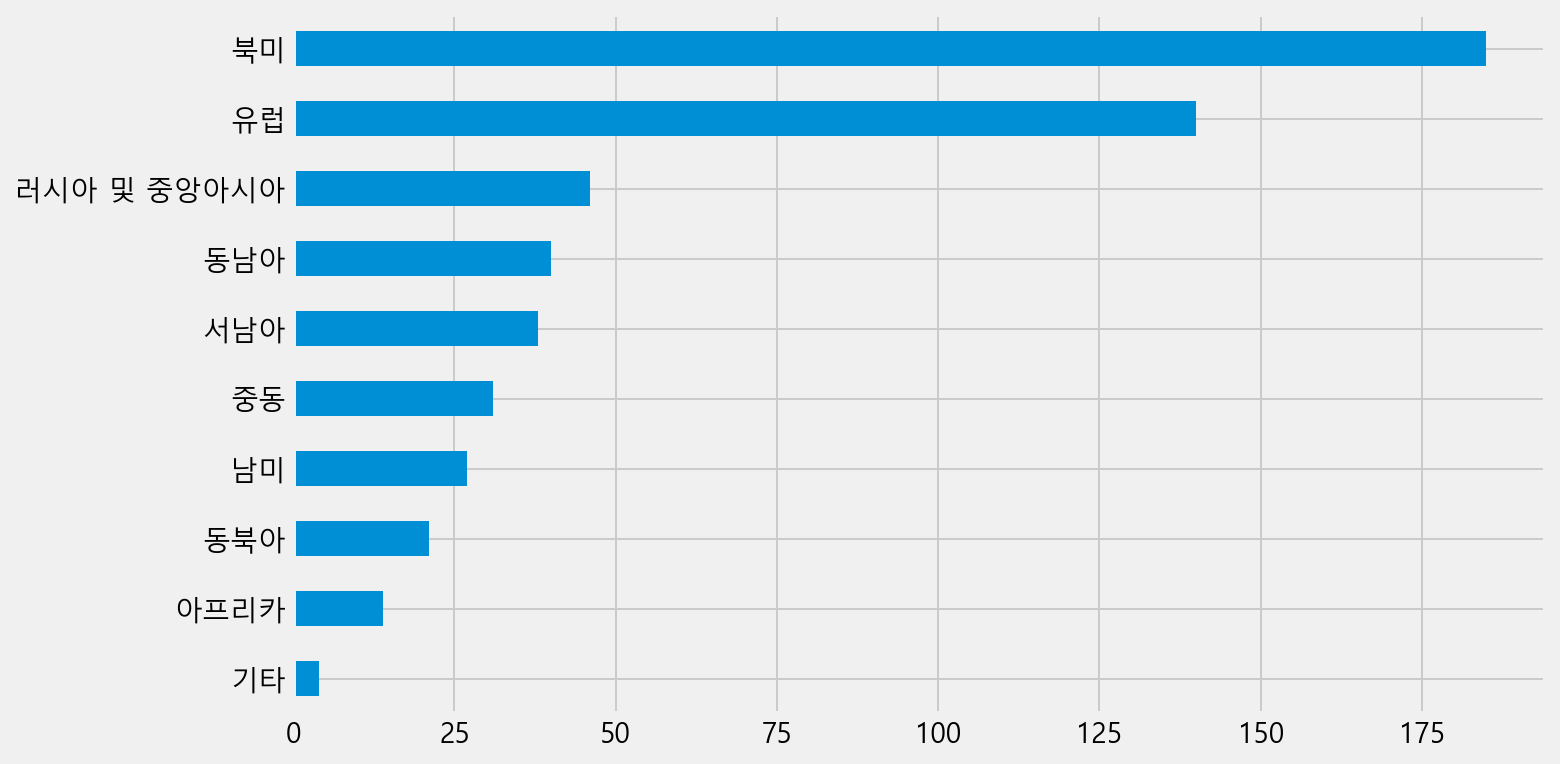

In [423]:
# 위에서 구한 빈도수를 시각화 합니다.
oversea_count.sort_values().plot.barh(figsize = (10, 6))

In [426]:
# 확진일자별 누적확진 수
df_day_oversea = df_day_oversea.set_index("확진일자")

<AxesSubplot:xlabel='확진일자'>

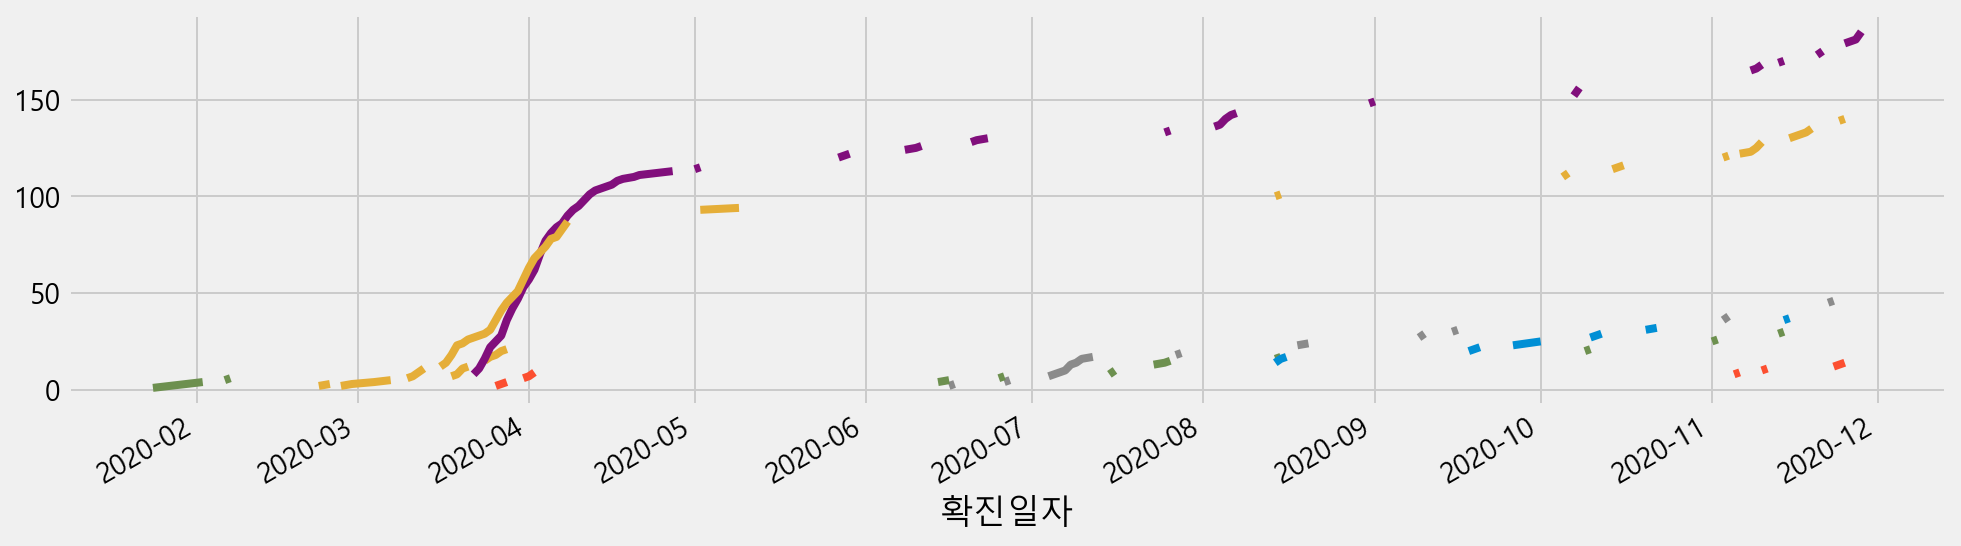

In [430]:
df_day_oversea.pivot(columns = "해외").plot(figsize = (15, 4), legend = False)

<AxesSubplot:xlabel='확진일자'>

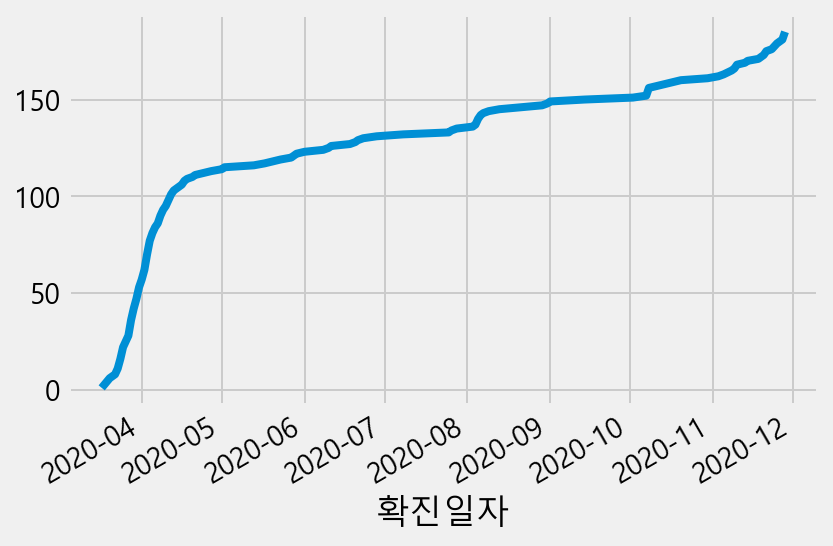

In [434]:
df_day_oversea.loc[df_day_oversea["해외"] == "북미", "누적확진수"].plot()

In [437]:
# 지역별 해외유입 누적확진 수
oversea_count_gu = df_oversea["지역"].value_counts()
oversea_count_gu.head()

타시도    68
강남구    55
용산구    42
마포구    36
송파구    34
Name: 지역, dtype: int64

<AxesSubplot:>

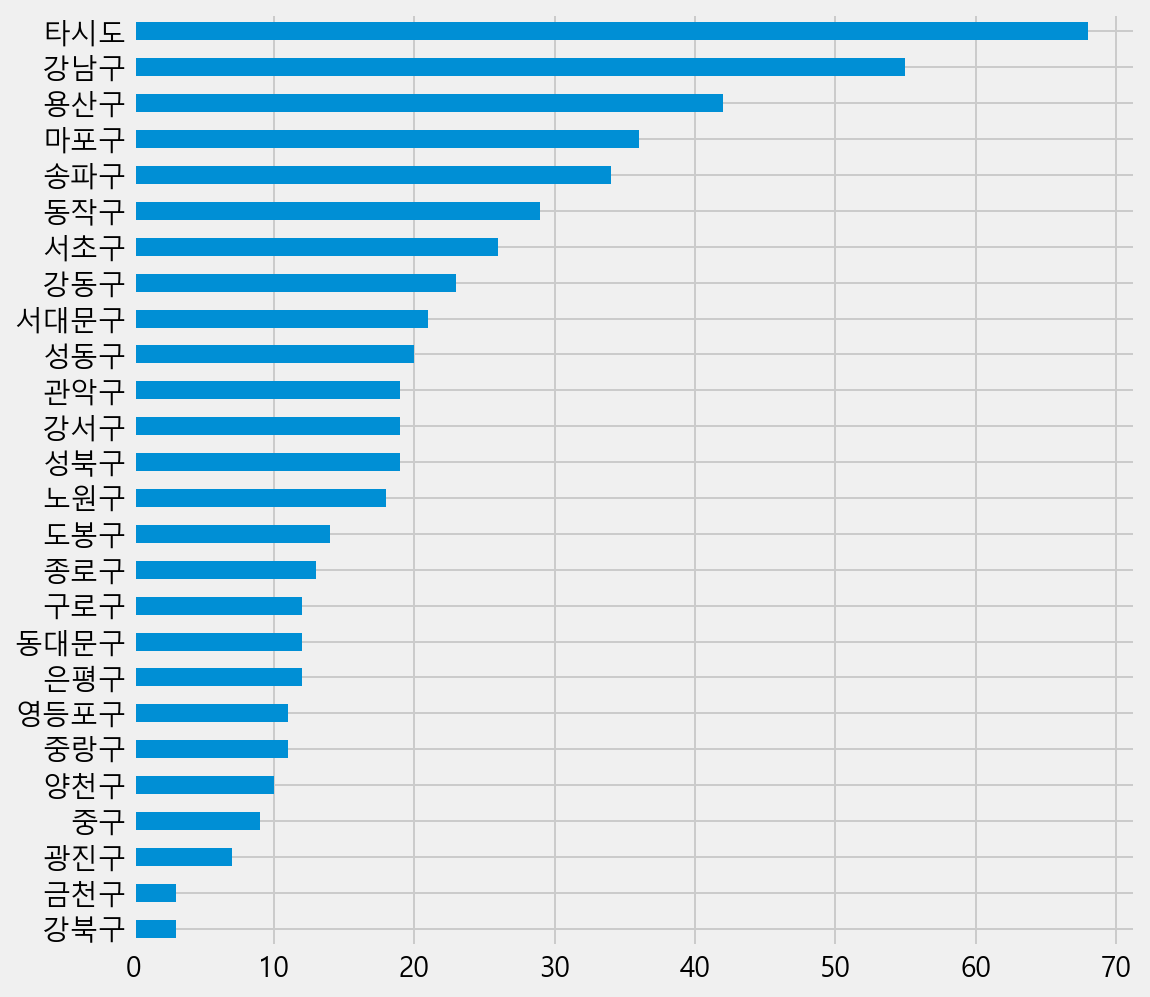

In [443]:
# "해외유입 구별 확진자" 시각화 하기
oversea_count_gu.sort_values().plot.barh(figsize = (8, 8))

### 전체확진수와 해외유입 확진수 비교

In [444]:
# all_count_gu 변수에 전체 지역의 확진자수 구하기
all_count_gu = df["지역"].value_counts()
all_count_gu.head()

타시도    650
송파구    599
강서구    573
관악구    532
강남구    494
Name: 지역, dtype: int64

In [450]:
# 데이터프레임으로 변환하고 컬럼명 변경하기
#pd.DataFrame({"해외확진수" : oversea_count_gu, "전체확진수" : all_count_gu})
df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ["전체확진수"]
df_all_gu.head()

,전체확진수
타시도,650
송파구,599
강서구,573
관악구,532
강남구,494


In [451]:
# 해외유입확진수 구하기
df_overseas_gu = pd.DataFrame({"해외유입확진수" : oversea_count_gu})
df_overseas_gu.head()

,해외유입확진수
타시도,68
강남구,55
용산구,42
마포구,36
송파구,34


### merge 를 통해 전체 확진수와 해외유입확진수 비교하기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [452]:
# merge 로 합쳐서 전체확진수와 해외유입확진수 비교해 보기
df_all_oversea_case = df_all_gu.merge(df_overseas_gu, left_index = True, right_index = True)
df_all_oversea_case

,전체확진수,해외유입확진수
타시도,650,68
송파구,599,34
강서구,573,19
관악구,532,19
강남구,494,55
노원구,458,18
성북구,453,19
서초구,450,26
동작구,382,29
은평구,351,12


<AxesSubplot:>

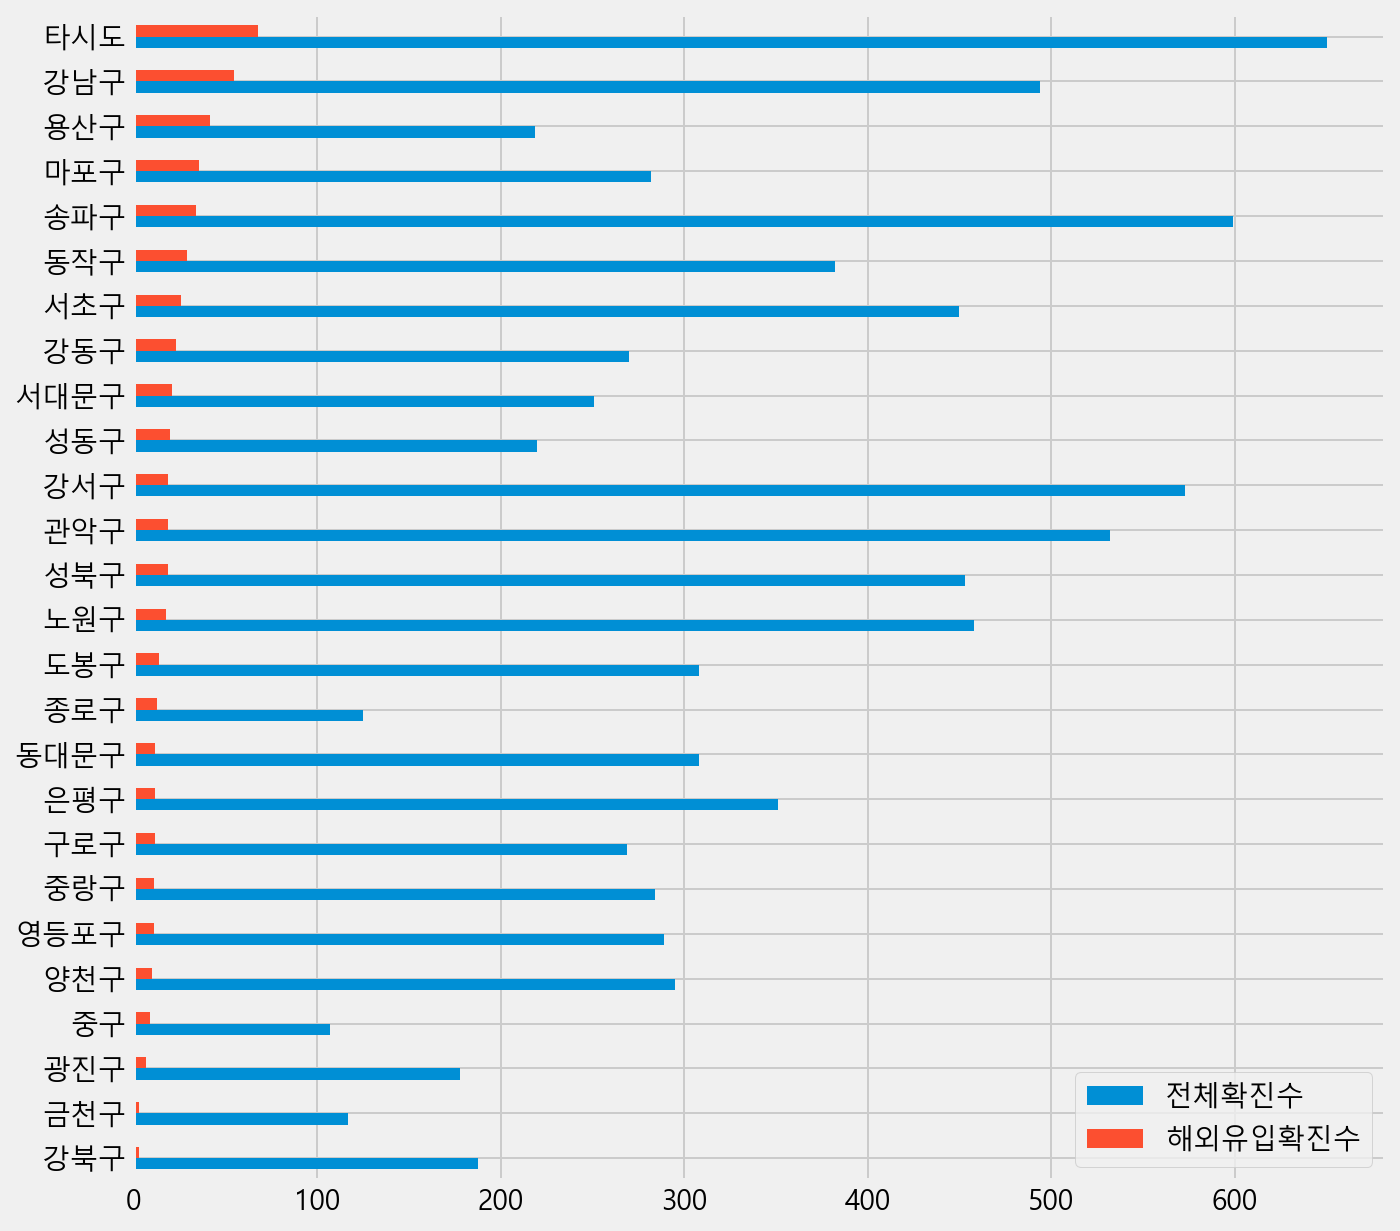

In [459]:
# 시각화 하기
df_all_oversea_case.sort_values(by = "해외유입확진수").plot.barh(figsize = (10, 10))

In [463]:
# df_all_oversea_case["해외유입비율"] 구하기
df_all_oversea_case["해외유입비율"] = df_all_oversea_case["해외유입확진수"] / df_all_oversea_case["전체확진수"] * 100
df_all_oversea_case.sort_values(by = ["해외유입비율", "해외유입확진수"], ascending = False)

,전체확진수,해외유입확진수,해외유입비율
용산구,219,42,19.178082
마포구,282,36,12.765957
강남구,494,55,11.133603
타시도,650,68,10.461538
종로구,125,13,10.400000
성동구,220,20,9.090909
강동구,270,23,8.518519
중구,107,9,8.411215
서대문구,251,21,8.366534
동작구,382,29,7.591623


### 해외유입 확진자 중 퇴원 여부

<AxesSubplot:xlabel='지역'>

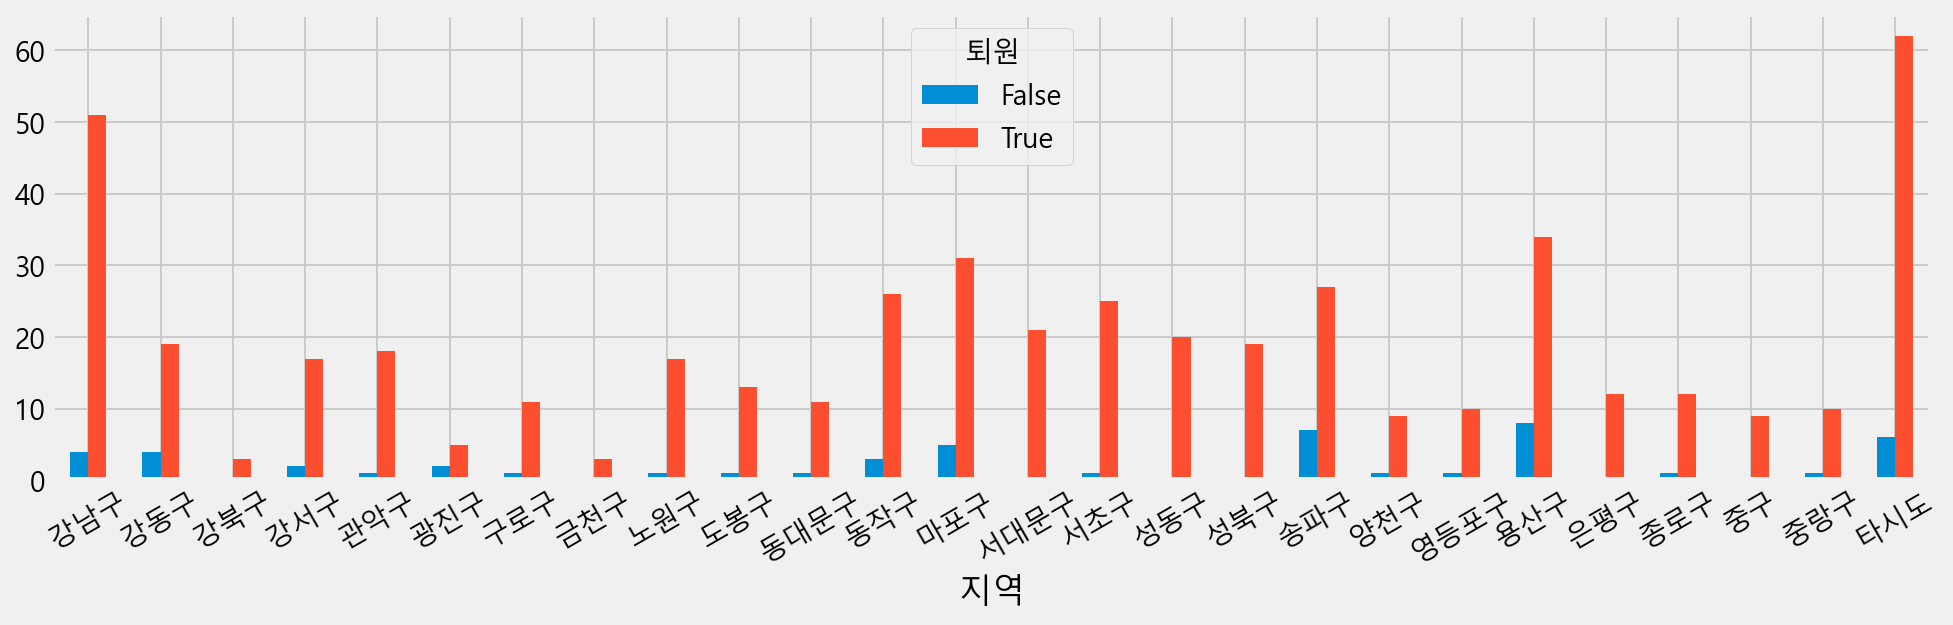

In [472]:
# oversea_finish_count 해외유입 확진자 중 퇴원 여부 구하기
oversea_finish_count = df_oversea.groupby(["지역", "퇴원"])["연번"].count().unstack()
oversea_finish_count.fillna(0).astype(int)
oversea_finish_count.plot.bar(figsize = (15, 4), rot = 30)

### 월별 해외 확진자 수

<AxesSubplot:>

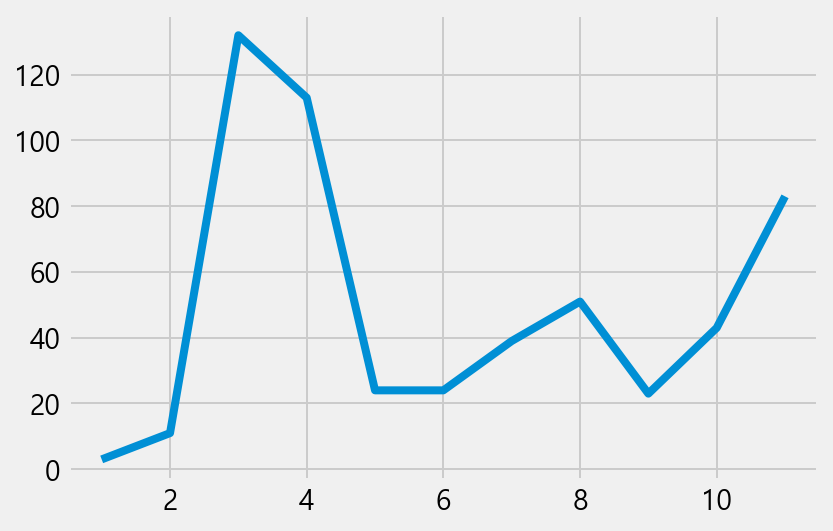

In [479]:
oversea_monthly_case = df_oversea["월"].value_counts()
oversea_monthly_case.sort_index().plot()

<AxesSubplot:>

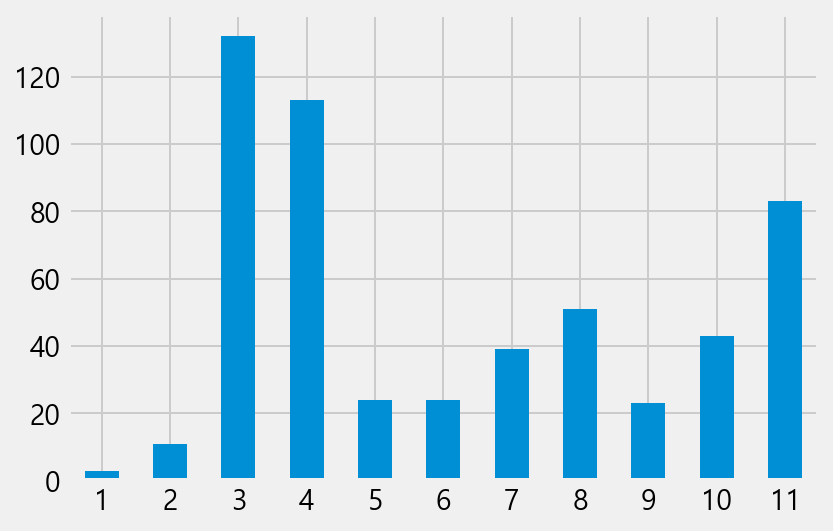

In [480]:
oversea_monthly_case.sort_index().plot.bar(rot = 0)

### 구와 월별 해외 확진자 수
* groupby, crosstab, pivot_table 로 같은 결과의 테이블이 나오도록 구합니다.
#### groupby 로 빈도수 구하기

In [486]:
month_gu = df_oversea.groupby(["월", "지역"])["연번"].count().unstack()
month_gu = month_gu.fillna(0).astype(int)
# month_gu.T.style.background_gradient(cmap = "Greens")
month_gu.style.background_gradient(cmap = "Greens")

월,1,2,3,4,5,6,7,8,9,10,11
지역,,,,,,,,,,,
강남구,0,2,21,16,2,0,0,1,4,3,6
강동구,0,1,4,1,2,2,4,0,1,3,5
강북구,0,0,1,0,1,0,0,0,0,0,1
강서구,1,1,3,2,2,0,1,2,0,2,5
관악구,0,0,6,5,1,2,1,2,0,1,1
광진구,0,1,3,0,0,0,0,1,0,0,2
구로구,0,0,9,0,0,1,0,0,0,1,1
금천구,0,0,3,0,0,0,0,0,0,0,0
노원구,0,0,3,2,2,2,2,2,1,1,3


#### crosstab 으로 빈도수 구하기

In [489]:
month_gu = pd.crosstab(df_oversea["월"], df_oversea["지역"])
month_gu.style.bar()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,2
3,21,4,1,3,6,3,9,3,3,4,1,12,4,1,10,2,5,9,1,3,6,3,2,3,5,8
4,16,1,0,2,5,0,0,0,2,3,5,5,7,5,8,12,6,8,1,5,5,2,2,0,2,11
5,2,2,1,2,1,0,0,0,2,2,0,0,1,2,0,1,0,1,0,0,6,0,1,0,0,0
6,0,2,0,0,2,0,1,0,2,0,1,0,0,2,2,1,0,1,3,1,0,2,1,1,1,1
7,0,4,0,1,1,0,0,0,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,4
8,1,0,0,2,2,1,0,0,2,3,2,4,2,0,1,0,3,3,1,0,5,1,1,3,0,14
9,4,1,0,0,0,0,0,0,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,0,0,7


#### pivot_table 로 빈도수 구하기

In [495]:
pd.options.display.max_columns = 30

In [496]:
# 결과가 dataframe으로 나오고 파라미터 설정 간편
month_gu = pd.pivot_table(df_oversea, index = "월", columns = "지역",
               values = "연번", aggfunc = "count", fill_value = 0)
month_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,2
3,21,4,1,3,6,3,9,3,3,4,1,12,4,1,10,2,5,9,1,3,6,3,2,3,5,8
4,16,1,0,2,5,0,0,0,2,3,5,5,7,5,8,12,6,8,1,5,5,2,2,0,2,11
5,2,2,1,2,1,0,0,0,2,2,0,0,1,2,0,1,0,1,0,0,6,0,1,0,0,0
6,0,2,0,0,2,0,1,0,2,0,1,0,0,2,2,1,0,1,3,1,0,2,1,1,1,1
7,0,4,0,1,1,0,0,0,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,4
8,1,0,0,2,2,1,0,0,2,3,2,4,2,0,1,0,3,3,1,0,5,1,1,3,0,14
9,4,1,0,0,0,0,0,0,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,0,0,7


### 해외유입이 많은 지역(구)

In [504]:
# 해외유입이 많은 상위 10개 지역을 구합니다.
top_oversea_gu = df_oversea["지역"].value_counts().head().index

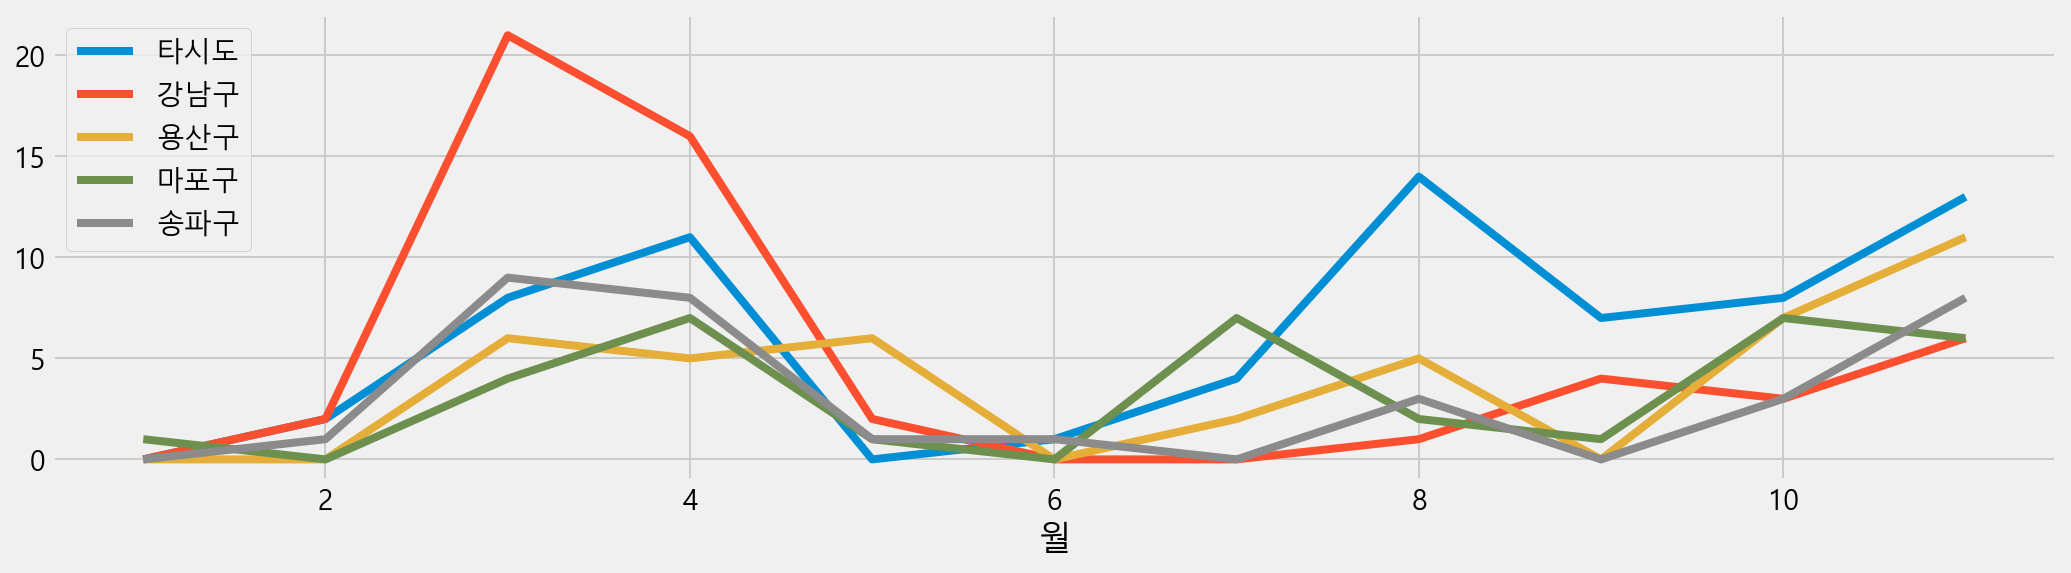

In [507]:
# 시각화 하기
g = month_gu[top_oversea_gu].plot(figsize = (16, 4))
g.legend(loc = 2)

* 범례 위치 조정하기 : [matplotlib.pyplot.legend — Matplotlib 3.1.2 documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)

### 구별 해외유입 국가 분석하기
#### groupby 로 구하기

In [509]:
group_oversea_gu = df_oversea.groupby(["해외", "지역"])["연번"].count().unstack().fillna(0).astype(int)
group_oversea_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
기타,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
남미,4,1,0,0,2,0,0,0,1,0,1,4,3,2,0,0,0,2,0,0,2,0,0,1,0,4
동남아,2,3,1,5,3,1,2,0,1,0,1,4,1,0,2,3,1,1,1,1,1,2,1,0,2,1
동북아,0,1,0,1,0,0,0,0,1,0,1,0,4,1,1,1,1,0,0,1,1,0,1,0,1,5
러시아 및 중앙아시아,1,4,0,3,2,0,0,0,4,0,1,3,4,2,0,0,2,1,3,0,0,0,1,5,2,8
북미,32,8,2,5,5,3,8,1,3,7,4,8,6,5,14,10,10,11,3,2,10,2,3,1,4,18
서남아,3,0,0,0,0,0,0,0,1,3,0,2,1,5,0,0,1,3,0,0,7,0,2,0,0,10
아프리카,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,3,0,1,1,0,3
유럽,13,4,0,5,6,3,2,2,4,2,2,6,14,3,9,5,4,12,1,7,14,4,3,1,1,13


#### pivot table 로 구하기
* groupby 로 구한 결과와 같은 결과가 나오게 구합니다.

In [532]:
group_oversea_gu = df_oversea.pivot_table(index= "해외", columns = "지역",
                       values = "연번", aggfunc = "count")
group_oversea_gu.style.background_gradient()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
기타,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,1.000000,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan
남미,4.000000,1.000000,nan,nan,2.000000,nan,nan,nan,1.000000,nan,1.000000,4.000000,3.000000,2.000000,nan,nan,nan,2.000000,nan,nan,2.000000,nan,nan,1.000000,nan,4.000000
동남아,2.000000,3.000000,1.000000,5.000000,3.000000,1.000000,2.000000,nan,1.000000,nan,1.000000,4.000000,1.000000,nan,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,nan,2.000000,1.000000
동북아,nan,1.000000,nan,1.000000,nan,nan,nan,nan,1.000000,nan,1.000000,nan,4.000000,1.000000,1.000000,1.000000,1.000000,nan,nan,1.000000,1.000000,nan,1.000000,nan,1.000000,5.000000
러시아 및 중앙아시아,1.000000,4.000000,nan,3.000000,2.000000,nan,nan,nan,4.000000,nan,1.000000,3.000000,4.000000,2.000000,nan,nan,2.000000,1.000000,3.000000,nan,nan,nan,1.000000,5.000000,2.000000,8.000000
북미,32.000000,8.000000,2.000000,5.000000,5.000000,3.000000,8.000000,1.000000,3.000000,7.000000,4.000000,8.000000,6.000000,5.000000,14.000000,10.000000,10.000000,11.000000,3.000000,2.000000,10.000000,2.000000,3.000000,1.000000,4.000000,18.000000
서남아,3.000000,nan,nan,nan,nan,nan,nan,nan,1.000000,3.000000,nan,2.000000,1.000000,5.000000,nan,nan,1.000000,3.000000,nan,nan,7.000000,nan,2.000000,nan,nan,10.000000
아프리카,nan,nan,nan,nan,1.000000,nan,nan,nan,1.000000,1.000000,1.000000,nan,1.000000,1.000000,nan,nan,nan,nan,nan,nan,3.000000,nan,1.000000,1.000000,nan,3.000000
유럽,13.000000,4.000000,nan,5.000000,6.000000,3.000000,2.000000,2.000000,4.000000,2.000000,2.000000,6.000000,14.000000,3.000000,9.000000,5.000000,4.000000,12.000000,1.000000,7.000000,14.000000,4.000000,3.000000,1.000000,1.000000,13.000000


#### 일부 구만 따로 보기
* 전체는 너무 많기 때문에 특정 구만 따로 봅니다.

In [530]:
# 강남 3구의 입국자는 해외 어느 지역에서 입국했나?
group_oversea_gu.loc[["북미", "동남아"], ["강남구", "서초구", "송파구"]]

지역,강남구,서초구,송파구
해외,,,
북미,32,14,11
동남아,2,2,1


In [538]:
# top_oversea_gu 에 따른 확진수 보기
group_oversea_gu[top_oversea_gu].dropna(how = "all").fillna(0).astype(int)

지역,타시도,강남구,용산구,마포구,송파구
해외,,,,,
남미,4,4,2,3,2
동남아,1,2,1,1,1
동북아,5,0,1,4,0
러시아 및 중앙아시아,8,1,0,4,1
북미,18,32,10,6,11
서남아,10,3,7,1,3
아프리카,3,0,3,1,0
유럽,13,13,14,14,12
중동,6,0,4,2,4
